## Forest Cover Type Prediction

### Abstract

The main aim of this notebook is to predict the Forest Cover type for Roosevelt National Forest. Initial Exploratory data analysis is done to check the relationship between Independent variables & dependent variable(Cover_Type). The dataset after converting categorical variables to features which can be fed into a predictive model, has 54 features many of which does not have a direct relationship with the target variable. Therefore, Feature selection techniques and Significance tests are performed to get the most importance & significant features. Classification techniques such as KNN, Random Forest, logistic are used to build a predictive model. Kfold Cross-Validation & Grid Search is used to generalize the model better on the data it has not seen and tune the hyperparameters to get the best prediction. A final model was build using the most important features in a bagging algorithm and achieved an accuracy of 96% on testing data with Cross Validation. 


### Dataset 

https://www.kaggle.com/uciml/forest-cover-type-dataset
This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

I have converted the dataset to convert the below categorical Variables to the respective values. Afterwards, I will apply encoding techniques to convert it into one hot encoding. 

1. Elevation = Elevation in meters.
2. Aspect = Aspect in degrees azimuth.
3. Slope = Slope in degrees.
4. Horizontal_Distance_To_Hydrology = Horizontal distance to nearest surface water features.
5. Vertical_Distance_To_Hydrology = Vertical distance to nearest surface water features.
6. Horizontal_Distance_To_Roadways = Horizontal distance to nearest roadway.
7. Hillshade_9am = Hill shade index at 9am, summer solstice. Value out of 255.
8. Hillshade_Noon = Hill shade index at noon, summer solstice. Value out of 255.
9. Hillshade_3pm = Hill shade index at 3pm, summer solstice. Value out of 255.
10. Horizontal_Distance_To_Fire_Point = sHorizontal distance to nearest wildfire ignition points.
11. Wilderness_Area1 = Rawah Wilderness Area
12. Wilderness_Area2 = Neota Wilderness Area
13. Wilderness_Area3 = Comanche Peak Wilderness Area
14. Wilderness_Area4 = Cache la Poudre Wilderness Area
15. Soil_Type1 to Soil_Type40

#### Target variable Cover_Type has Integer values between 1 and 7, with the following keys:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [1]:
#Import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.feature_selection import RFECV, SelectFromModel, variance_threshold, SelectKBest, mutual_info_classif, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# change the working directory
os.chdir('N:\MACHINE LEARNING PROJECTS\Data Science\Forest Cover Type Prediction')

In [3]:
# Read the Forest Cover data from the csv using pandas

df_forest = pd.read_csv('forest_covertype.csv')
df_forest.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   
7       2605      49      4                               234   
8       2617      45      9                               240   
9       2612      59     10                               247   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   
5                             -15                               67   
6                               5                              633   
7                               7                              573   
8                              56                              666   
9                              11                              636   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   
5            230             237            140   
6            222             225            138   
7            222             230            144   
8            223             221            133   
9            228             219            124   

   Horizontal_Distance_To_Fire_Points    Soil_Type   Wilderness_Area  \
0                                6279  Soil_Type29  Wilderness_Area1   
1                                6225  Soil_Type29  Wilderness_Area1   
2                                6121  Soil_Type12  Wilderness_Area1   
3                                6211  Soil_Type30  Wilderness_Area1   
4                                6172  Soil_Type29  Wilderness_Area1   
5                                6031  Soil_Type29  Wilderness_Area1   
6                                6256  Soil_Type29  Wilderness_Area1   
7                                6228  Soil_Type29  Wilderness_Area1   
8                                6244  Soil_Type29  Wilderness_Area1   
9                                6230  Soil_Type29  Wilderness_Area1   

   Cover_Type  
0           5  
1           5  
2           2  
3           2  
4           5  
5           2  
6           5  
7           5  
8           5  
9           5

## Data Exploration/Analysis

In [4]:
df_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Soil_Type                             581012 non-null object
Wilderness_Area                       581012 non-null object
Cover_Type                            581012 non-null int64
dtypes: int64(11), object(2)
memory usage: 57.6+ MB


In [5]:
df_forest.columns.values

array(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Soil_Type',
       'Wilderness_Area', 'Cover_Type'], dtype=object)

In [6]:
df_forest.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points     Cover_Type  
count  581012.000000                       581012.000000  581012.000000  
mean      142.528263                         1980.291226       2.051471  
std        38.274529                         1324.195210       1.396504  
min         0.000000                            0.000000       1.000000  
25%       119.000000                         1024.000000       1.000000  
50%       143.000000                         1710.000000       2.000000  
75%       168.000000                         2550.000000       2.000000  
max       254.000000                         7173.000000       7.000000

In [7]:
df_forest.shape

(581012, 13)

In [8]:
df_forest.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Soil_Type                             0
Wilderness_Area                       0
Cover_Type                            0
dtype: int64

In [9]:
df_forest = df_forest.rename(columns= {'Horizontal_Distance_To_Hydrology':'Horz_Dist_To_Hydro',
                                      'Vertical_Distance_To_Hydrology':'Vert_Dist_To_Hydro',
                                      'Horizontal_Distance_To_Roadways':'Horizontal_Distance_To_Roadways',
                                      'Horizontal_Distance_To_Fire_Points':'Horizontal_Distance_To_Fire_Points'})

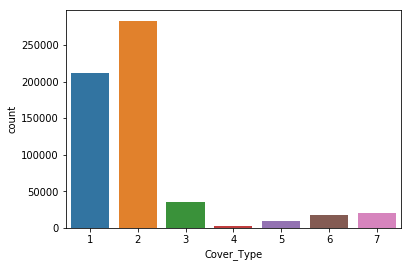

In [10]:
ax = sns.countplot(df_forest['Cover_Type'],label="Count") 
pruce, Lodgepole, Ponderosa, Cottonwood, Aspen, Douglas, Krummholz = df_forest['Cover_Type'].value_counts()


## Outlier Detection

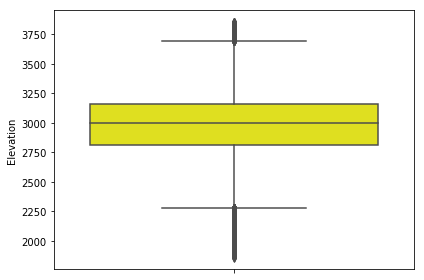

In [30]:
sns.boxplot(y=df_forest['Elevation'],color='Yellow')
plt.tight_layout()

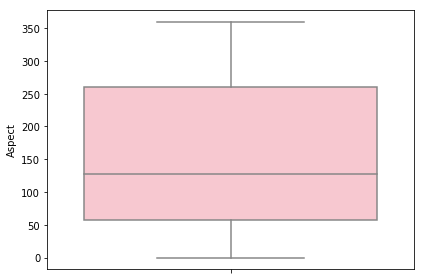

In [31]:
sns.boxplot(y=df_forest['Aspect'],color='Pink')
plt.tight_layout()

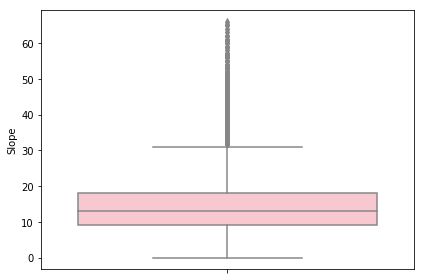

In [32]:
sns.boxplot(y=df_forest['Slope'],color='Pink')
plt.tight_layout()

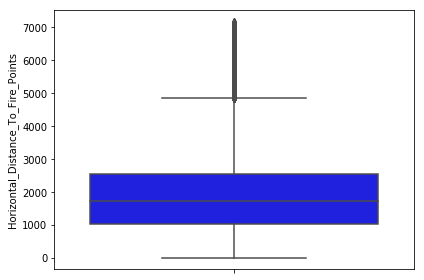

In [33]:
sns.boxplot(y=df_forest['Horizontal_Distance_To_Fire_Points'],color='Blue')
plt.tight_layout()

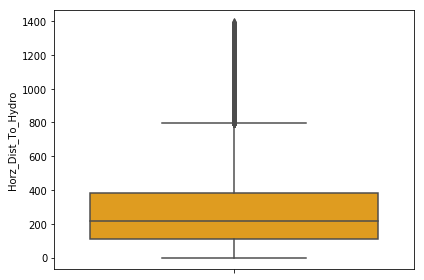

In [34]:
sns.boxplot(y=df_forest['Horz_Dist_To_Hydro'],color='orange')
plt.tight_layout()

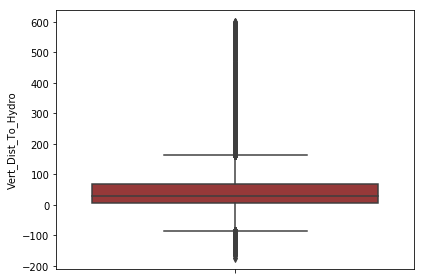

In [35]:
sns.boxplot(y=df_forest['Vert_Dist_To_Hydro'],color='brown')
plt.tight_layout()

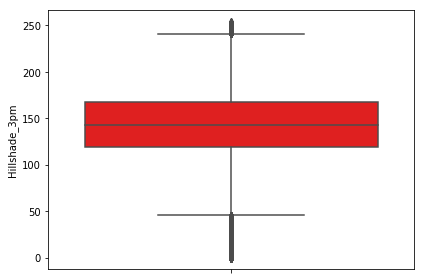

In [36]:
sns.boxplot(y=df_forest['Hillshade_3pm'],color='red')
plt.tight_layout()

## Remove Outliers 

In [18]:
df_forest_temp = df_forest
df_forest_temp = df_forest_temp.drop(columns=['Cover_Type'])
df_forest_temp.head()

Elevation  Aspect  Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
0       2596      51      3                 258                   0   
1       2590      56      2                 212                  -6   
2       2804     139      9                 268                  65   
3       2785     155     18                 242                 118   
4       2595      45      2                 153                  -1   

   Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                              510            221             232   
1                              390            220             235   
2                             3180            234             238   
3                             3090            238             238   
4                              391            220             234   

   Hillshade_3pm  Horizontal_Distance_To_Fire_Points    Soil_Type  \
0            148                                6279  Soil_Type29   
1            151                                6225  Soil_Type29   
2            135                                6121  Soil_Type12   
3            122                                6211  Soil_Type30   
4            150                                6172  Soil_Type29   

    Wilderness_Area  
0  Wilderness_Area1  
1  Wilderness_Area1  
2  Wilderness_Area1  
3  Wilderness_Area1  
4  Wilderness_Area1

In [19]:
Q1 = df_forest_temp.quantile(0.25)
Q3 = df_forest_temp.quantile(0.75)
IQR = Q3 - Q1
IQR

Elevation                              354.0
Aspect                                 202.0
Slope                                    9.0
Horz_Dist_To_Hydro                     276.0
Vert_Dist_To_Hydro                      62.0
Horizontal_Distance_To_Roadways       2222.0
Hillshade_9am                           33.0
Hillshade_Noon                          24.0
Hillshade_3pm                           49.0
Horizontal_Distance_To_Fire_Points    1526.0
dtype: float64

In [11]:
df_forest_clean = df_forest #[~((df_forest_temp < (Q1 - 1.5 * IQR)) |(df_forest_temp > (Q3 + 1.5 * IQR))).any(axis=1)]


Since the number of Outliers is very high, we should not remove them. I will use the algortihms which are not affected by outliers.
Also the other experiments notebook will have modeling after removing Outliers. Which resulted in a lower f1 score as expected
as removing such a large number of data would not help. 

In [12]:
df_forest_clean.Cover_Type.unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [13]:
## Categorical features

In [14]:
df_forest_clean.describe(include=['object'])

Soil_Type   Wilderness_Area
count        581012            581012
unique           40                 4
top     Soil_Type29  Wilderness_Area1
freq         115247            260796

In [15]:
categorical_var = df_forest_clean.describe(include=['object']).columns
categorical_var

Index(['Soil_Type', 'Wilderness_Area'], dtype='object')

In [16]:
df_forest_clean.Soil_Type.unique()

array(['Soil_Type29', 'Soil_Type12', 'Soil_Type30', 'Soil_Type18',
       'Soil_Type16', 'Soil_Type20', 'Soil_Type24', 'Soil_Type23',
       'Soil_Type40', 'Soil_Type19', 'Soil_Type8', 'Soil_Type22',
       'Soil_Type39', 'Soil_Type9', 'Soil_Type38', 'Soil_Type33',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type11', 'Soil_Type10',
       'Soil_Type5', 'Soil_Type28', 'Soil_Type4', 'Soil_Type1',
       'Soil_Type13', 'Soil_Type2', 'Soil_Type17', 'Soil_Type3',
       'Soil_Type34', 'Soil_Type6', 'Soil_Type14', 'Soil_Type37',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type21', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type25', 'Soil_Type7', 'Soil_Type15'],
      dtype=object)

In [17]:
df_forest_clean.Wilderness_Area.unique()

array(['Wilderness_Area1', 'Wilderness_Area3', 'Wilderness_Area4',
       'Wilderness_Area2'], dtype=object)

## EDA (Exploratory Data Analysis)

In [18]:
df_continous = df_forest_clean.loc[:,df_forest_clean.describe().columns]
df_continous.head()

Elevation  Aspect  Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
0       2596      51      3                 258                   0   
1       2590      56      2                 212                  -6   
2       2804     139      9                 268                  65   
3       2785     155     18                 242                 118   
4       2595      45      2                 153                  -1   

   Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                              510            221             232   
1                              390            220             235   
2                             3180            234             238   
3                             3090            238             238   
4                              391            220             234   

   Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Cover_Type  
0            148                                6279           5  
1            151                                6225           5  
2            135                                6121           2  
3            122                                6211           2  
4            150                                6172           5

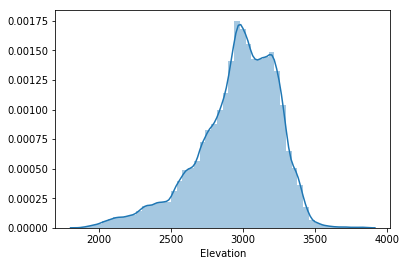

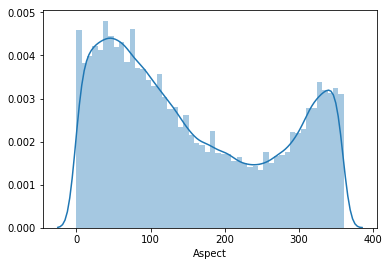

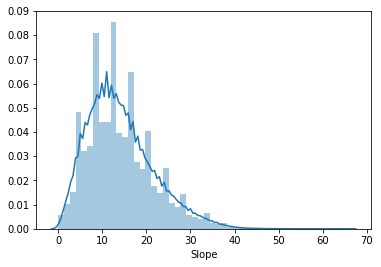

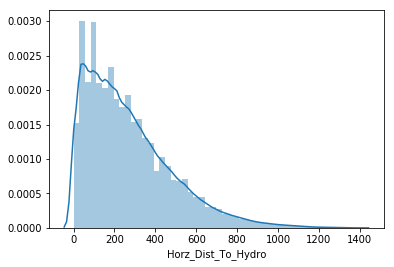

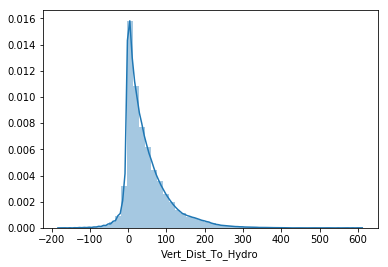

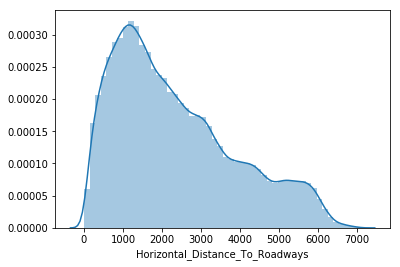

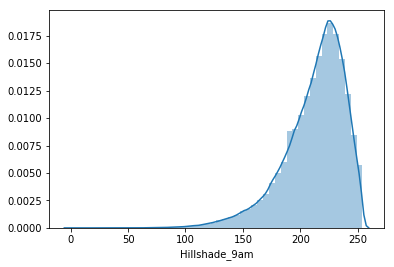

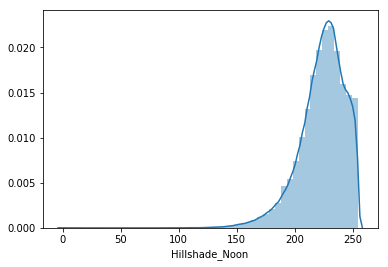

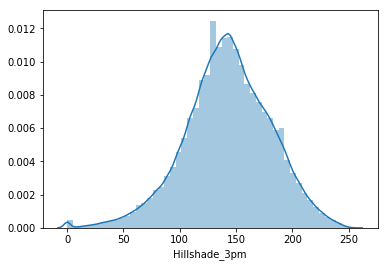

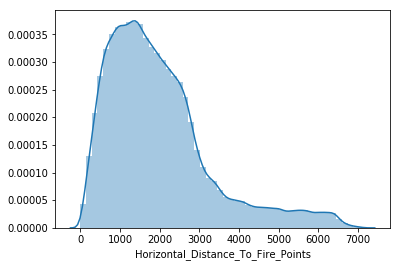

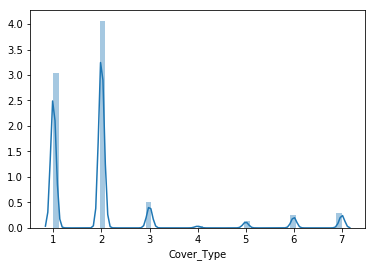

In [42]:
for index, column in enumerate(df_continous.columns):
    plt.figure(index)
    sns.distplot(df_continous[column])

Some of the feature distributions are skewed to the right. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028523142A58>,
      dtype=object)

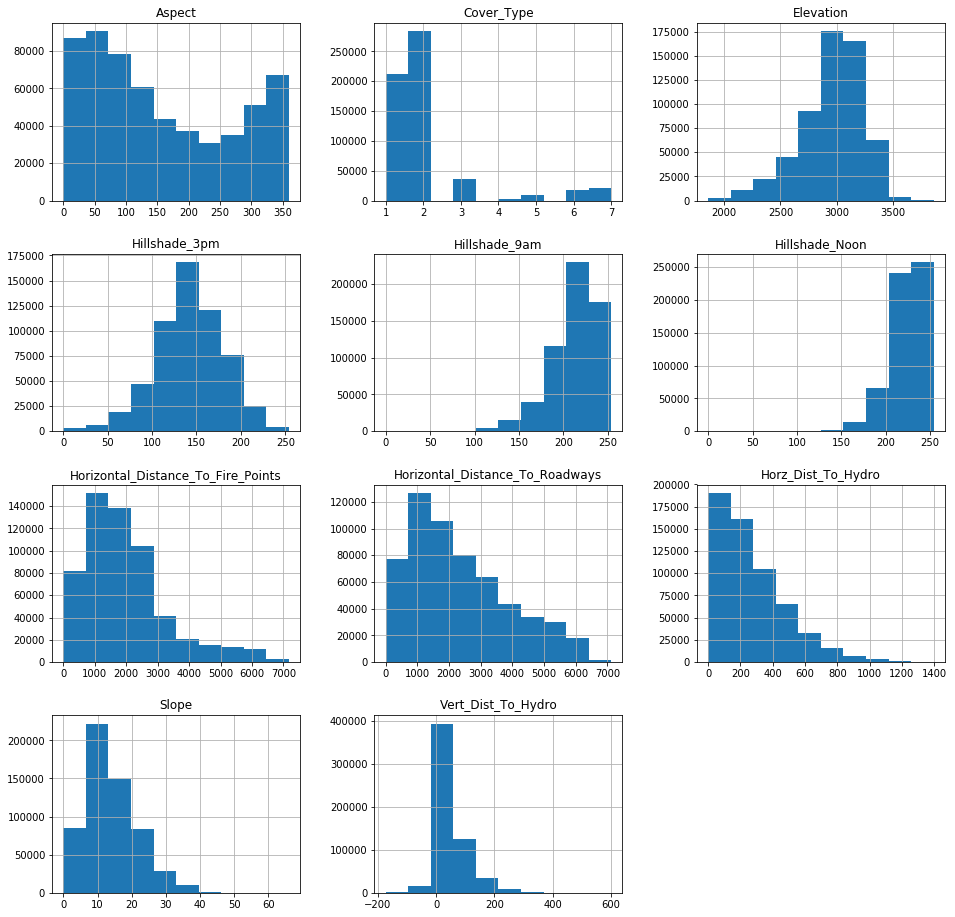

In [43]:
df_forest_clean.hist(column=df_continous.columns, figsize = (16,16))

### Associations & Correlations Between Variables


I'll analyze the relation between independent features & the target variable(Cover Type).
I will be using scatterplot, pairplot, correlations coefficients to explore potential associations between the features.

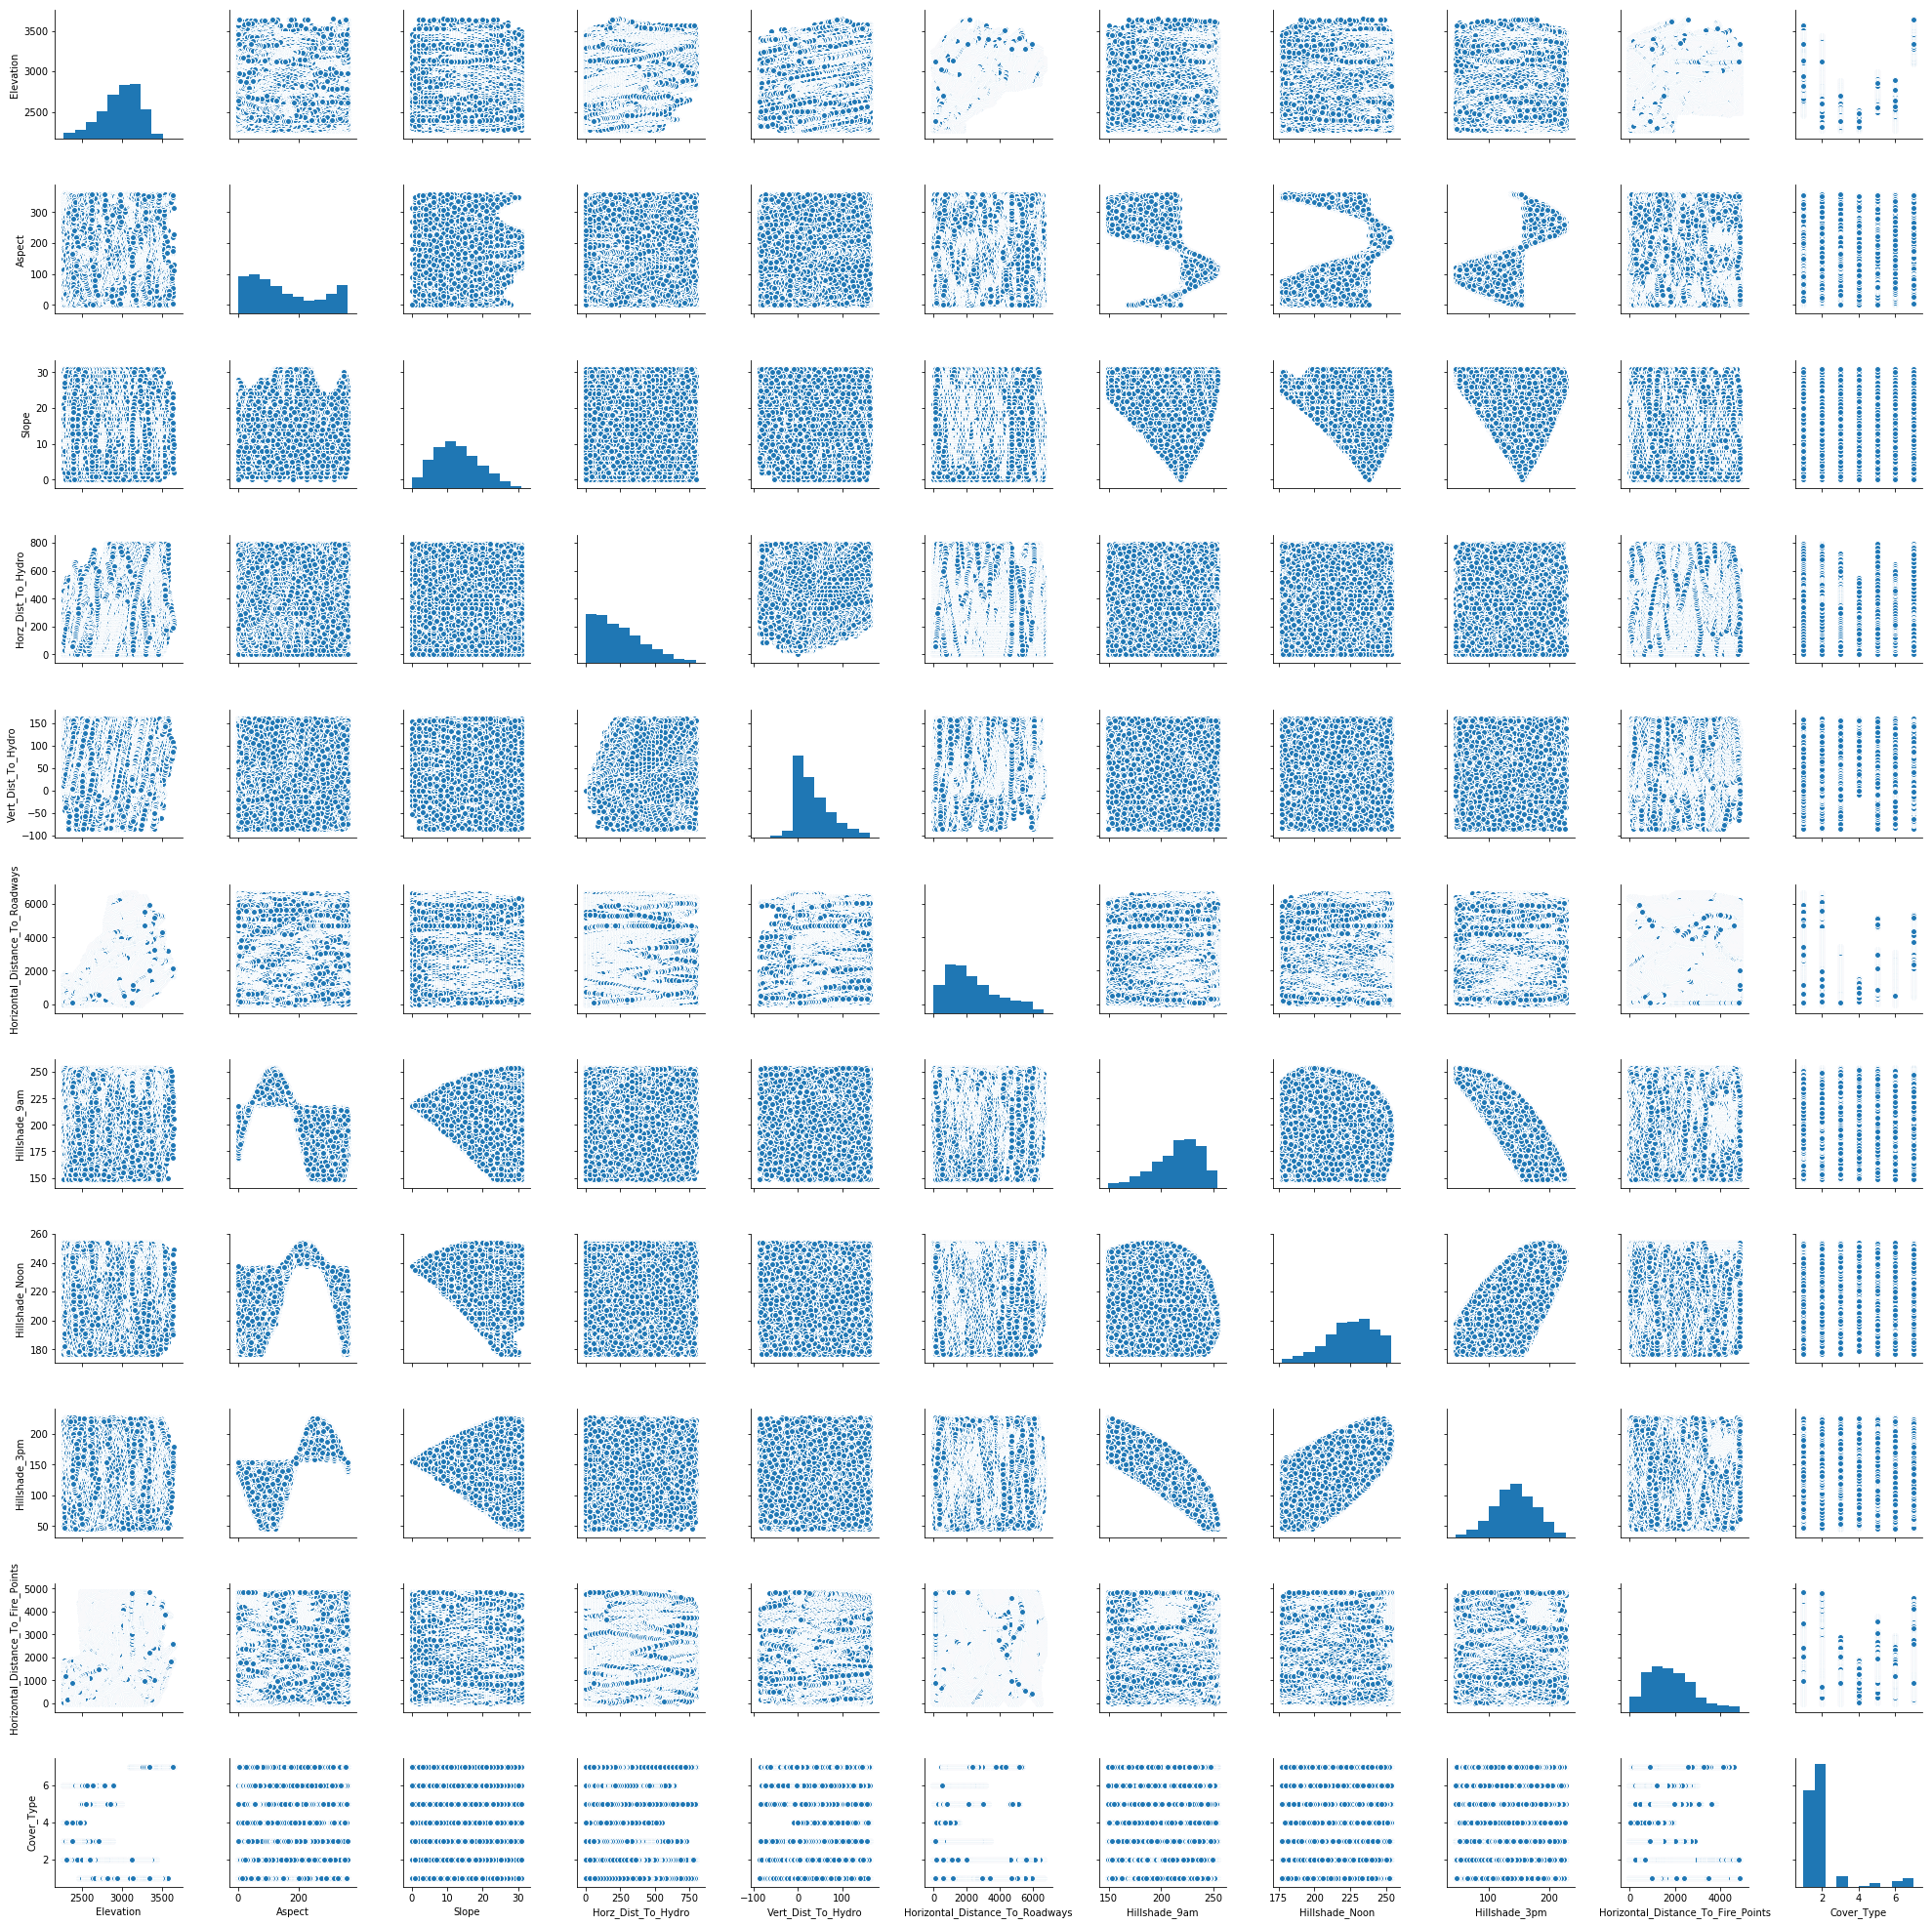

In [93]:
sns.pairplot(df_continous)

Pair plot shows there is a correlation between - 
- Hillshade_3pm , Hillshade_9am & Hillshade_Noon
- Hillshade_3pm & Aspect

In [44]:
df_forest_clean.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Soil_Type', 'Wilderness_Area',
       'Cover_Type'],
      dtype='object')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

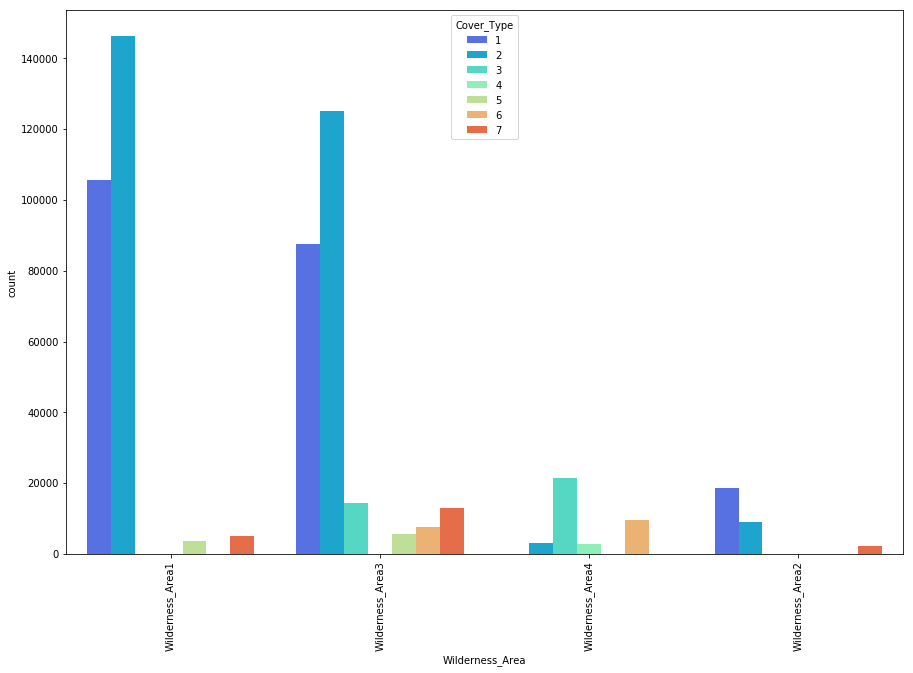

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(x='Wilderness_Area', hue='Cover_Type',data=df_forest_clean, palette="rainbow")
plt.xticks(rotation=90)

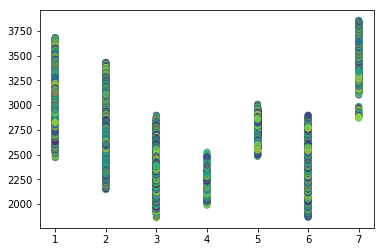

In [47]:
import numpy as np
colors = np.random.rand(len(df_forest_clean))
N = len(df_forest_clean)
area = (30 * np.random.rand(N))**2

plt.scatter(df_forest_clean['Cover_Type'], df_forest_clean['Elevation'], c=colors, alpha=0.5)
plt.show()

### Analysing relationship between Countinous features & target

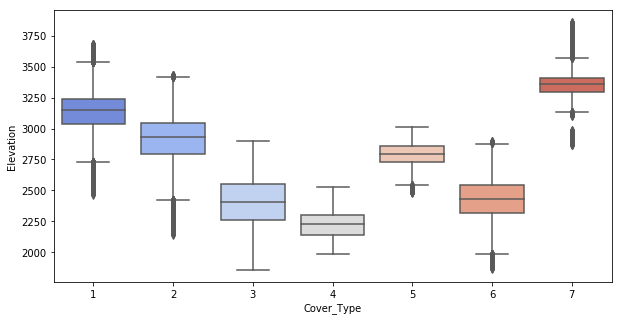

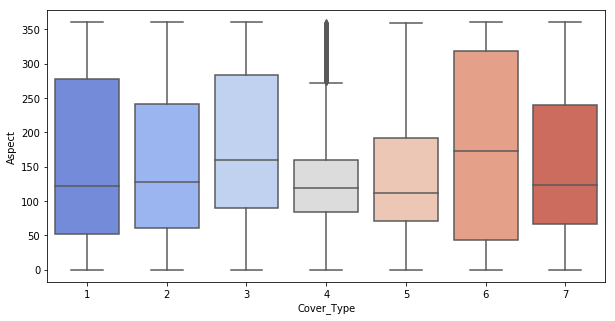

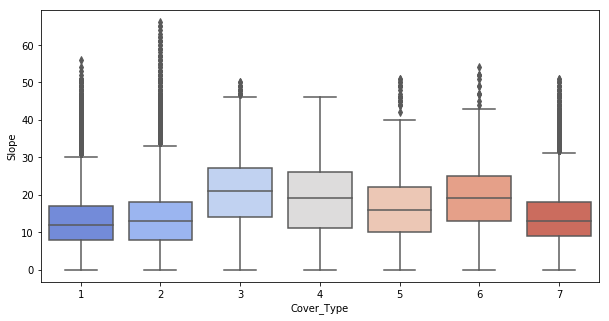

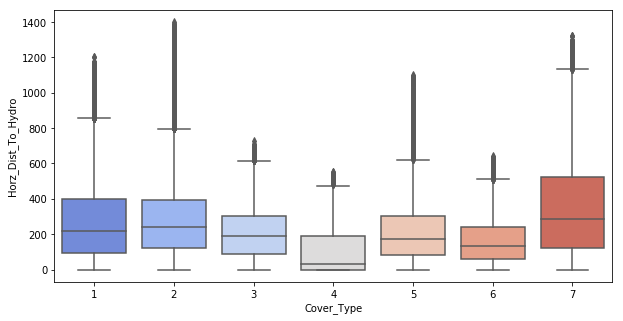

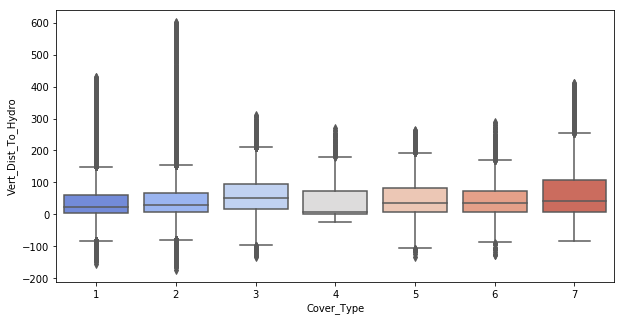

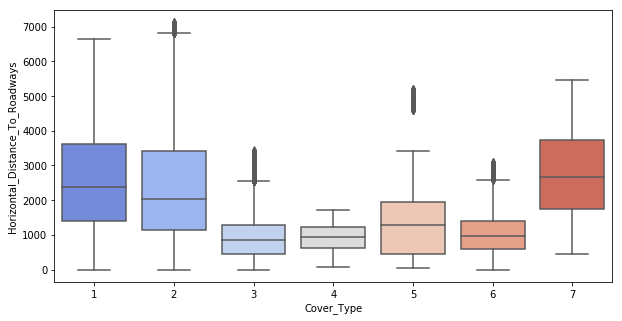

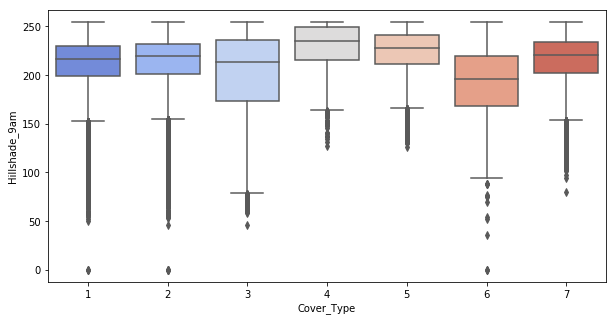

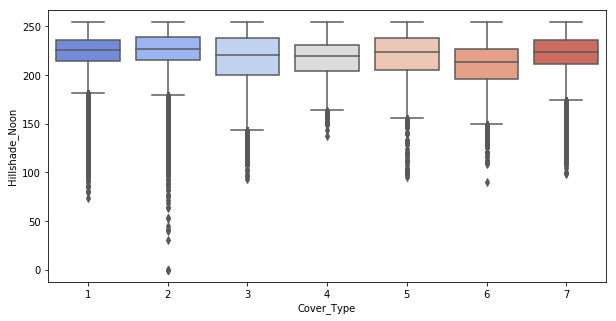

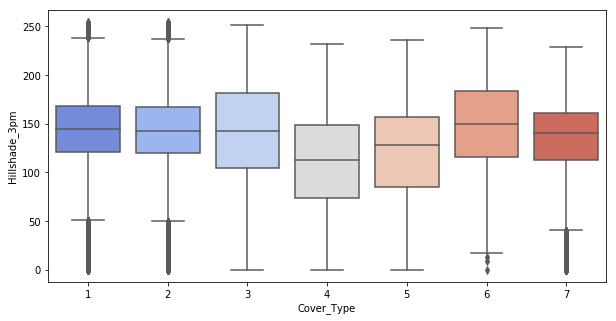

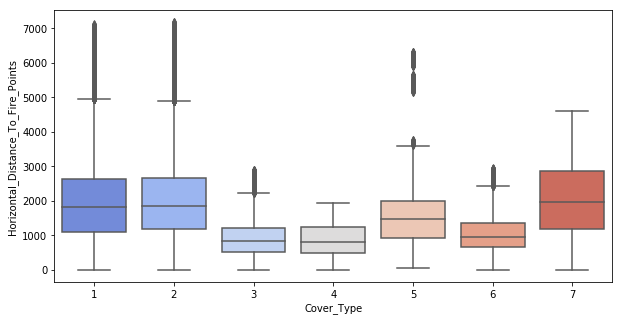

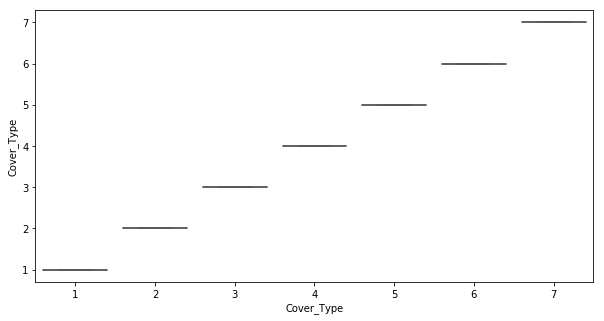

In [48]:
for ind, col in enumerate(df_continous.columns):
    plt.figure(ind,figsize=(10,5))
    sns.boxplot(x=df_forest_clean['Cover_Type'], y=col, data=df_forest_clean, palette="coolwarm")

Very few features have correlation with each other, let's further analyze that between countinous features using Pearson's coefficient r to measure the strength and direction of the relationship of few features.

In [49]:
df_continous.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type'],
      dtype='object')

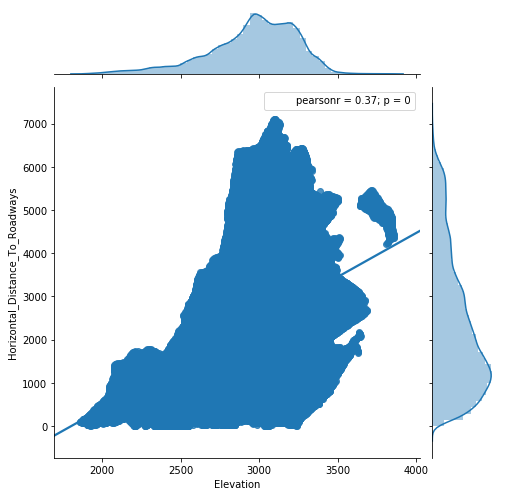

In [56]:
from scipy.stats import pearsonr
sns.jointplot(x="Elevation", y="Horizontal_Distance_To_Roadways", data=df_forest_clean, kind = 'reg', size = 7, stat_func=pearsonr)
plt.show()

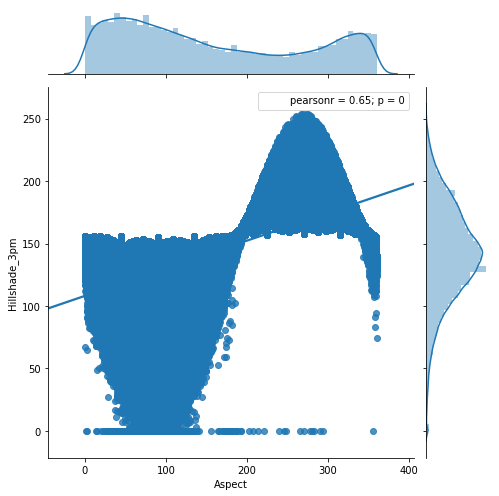

In [52]:
sns.jointplot(x="Aspect", y="Hillshade_3pm", data=df_forest_clean, kind = 'reg', size = 7)
plt.show()

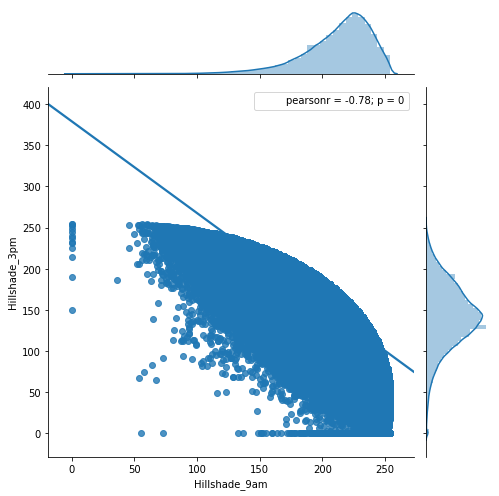

In [57]:
sns.jointplot(x="Hillshade_9am", y="Hillshade_3pm", data=df_forest_clean, kind = 'reg', size = 7, stat_func=pearsonr)
plt.show()

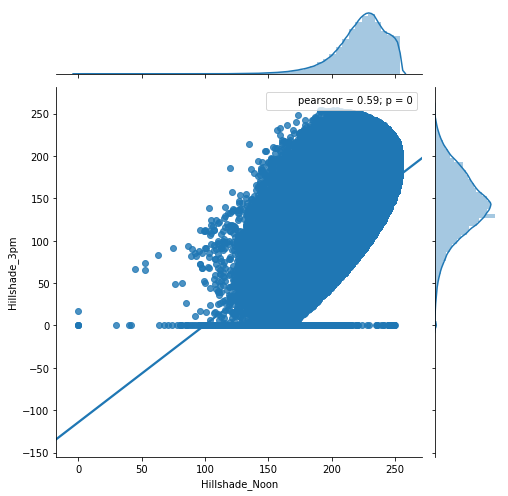

In [58]:
sns.jointplot(x="Hillshade_Noon", y="Hillshade_3pm", data=df_forest_clean, kind = 'reg', size = 7, stat_func=pearsonr)
plt.show()

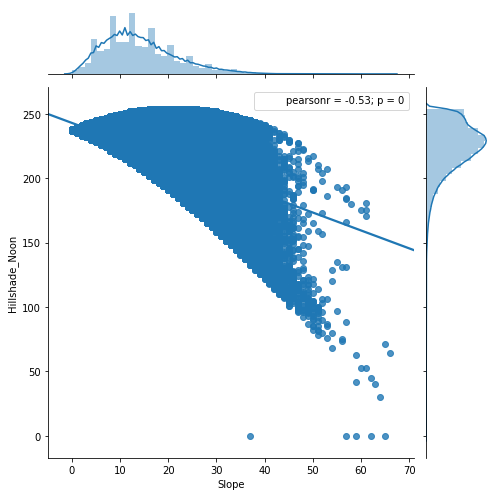

In [59]:
sns.jointplot(x="Slope", y="Hillshade_Noon", data=df_forest_clean, kind = 'reg', size = 7, stat_func=pearsonr)
plt.show()

As we can see, There is no strong linear correlation between these independent features except for Hillshade_9am & Hillshade_3pm. They seem to have a strong negative correlation(r=-.78)

As the relationship looks non-linear,let us calculate spearman's correlation. It is also not affected by Outliers unlike the pearson correlation.

In [61]:
ranked_data = df_continous.rank()
spearman_corr = ranked_data.loc[:,:].corr(method= "pearson")
print("Spearman's correlation: ")
spearman_corr

Spearman's correlation: 


Elevation    Aspect     Slope  \
Elevation                            1.000000  0.044060 -0.160297   
Aspect                               0.044060  1.000000  0.072005   
Slope                               -0.160297  0.072005  1.000000   
Horz_Dist_To_Hydro                   0.287402  0.004692  0.019206   
Vert_Dist_To_Hydro                   0.086931  0.073052  0.301333   
Horizontal_Distance_To_Roadways      0.341590  0.019418 -0.205023   
Hillshade_9am                        0.015100 -0.428957 -0.131244   
Hillshade_Noon                       0.150427  0.421134 -0.434180   
Hillshade_3pm                        0.072750  0.640536 -0.173474   
Horizontal_Distance_To_Fire_Points   0.154851 -0.112724 -0.169574   
Cover_Type                          -0.491177  0.025320  0.151078   

                                    Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
Elevation                                     0.287402            0.086931   
Aspect                                        0.004692            0.073052   
Slope                                         0.019206            0.301333   
Horz_Dist_To_Hydro                            1.000000            0.619386   
Vert_Dist_To_Hydro                            0.619386            1.000000   
Horizontal_Distance_To_Roadways               0.047026           -0.037963   
Hillshade_9am                                -0.041990           -0.128754   
Hillshade_Noon                                0.028134           -0.095524   
Hillshade_3pm                                 0.037528            0.037780   
Horizontal_Distance_To_Fire_Points            0.073760           -0.043495   
Cover_Type                                   -0.027699            0.095683   

                                    Horizontal_Distance_To_Roadways  \
Elevation                                                  0.341590   
Aspect                                                     0.019418   
Slope                                                     -0.205023   
Horz_Dist_To_Hydro                                         0.047026   
Vert_Dist_To_Hydro                                        -0.037963   
Horizontal_Distance_To_Roadways                            1.000000   
Hillshade_9am                                             -0.009994   
Hillshade_Noon                                             0.173793   
Hillshade_3pm                                              0.102471   
Horizontal_Distance_To_Fire_Points                         0.322301   
Cover_Type                                                -0.221889   

                                    Hillshade_9am  Hillshade_Noon  \
Elevation                                0.015100        0.150427   
Aspect                                  -0.428957        0.421134   
Slope                                   -0.131244       -0.434180   
Horz_Dist_To_Hydro                      -0.041990        0.028134   
Vert_Dist_To_Hydro                      -0.128754       -0.095524   
Horizontal_Distance_To_Roadways         -0.009994        0.173793   
Hillshade_9am                            1.000000       -0.101311   
Hillshade_Noon                          -0.101311        1.000000   
Hillshade_3pm                           -0.823424        0.573942   
Horizontal_Distance_To_Fire_Points       0.124450        0.017162   
Cover_Type                               0.012894       -0.034298   

                                    Hillshade_3pm  \
Elevation                                0.072750   
Aspect                                   0.640536   
Slope                                   -0.173474   
Horz_Dist_To_Hydro                       0.037528   
Vert_Dist_To_Hydro                       0.037780   
Horizontal_Distance_To_Roadways          0.102471   
Hillshade_9am                           -0.823424   
Hillshade_Noon                           0.573942   
Hillshade_3pm                            1.000000   
Horizontal_Distance_To_Fire_Points      -0.082736   
Cover

This also shows a Strong negative correlation between Hillshade_3pm and Hillshade_9am

## Feature Engineering & Feature selection

In [19]:
df_forest_bckup = df_forest_clean

In [20]:
Wilderness = pd.get_dummies(df_forest_clean["Wilderness_Area"], prefix_sep='_', drop_first=True)
Soil = pd.get_dummies(df_forest_clean["Soil_Type"], prefix_sep='_', drop_first=True)

df_forest_final=pd.concat([df_forest_clean,Wilderness], axis=1)
df_forest_final= pd.concat([df_forest_final, Soil], axis=1)
df_forest_final.head()


Elevation  Aspect  Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
0       2596      51      3                 258                   0   
1       2590      56      2                 212                  -6   
2       2804     139      9                 268                  65   
3       2785     155     18                 242                 118   
4       2595      45      2                 153                  -1   

   Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                              510            221             232   
1                              390            220             235   
2                             3180            234             238   
3                             3090            238             238   
4                              391            220             234   

   Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ... Soil_Type37  \
0            148                                6279  ...           0   
1            151                                6225  ...           0   
2            135                                6121  ...           0   
3            122                                6211  ...           0   
4            150                                6172  ...           0   

  Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  Soil_Type5  Soil_Type6  \
0           0            0           0            0           0           0   
1           0            0           0            0           0           0   
2           0            0           0            0           0           0   
3           0            0           0            0           0           0   
4           0            0           0            0           0           0   

   Soil_Type7  Soil_Type8  Soil_Type9  
0           0           0           0  
1           0           0           0  
2           0           0           0  
3           0           0           0  
4           0           0           0  

[5 rows x 55 columns]

In [21]:
df_forest_final = df_forest_final.drop(columns=['Wilderness_Area','Soil_Type'])
df_forest_final.head()

Elevation  Aspect  Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
0       2596      51      3                 258                   0   
1       2590      56      2                 212                  -6   
2       2804     139      9                 268                  65   
3       2785     155     18                 242                 118   
4       2595      45      2                 153                  -1   

   Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                              510            221             232   
1                              390            220             235   
2                             3180            234             238   
3                             3090            238             238   
4                              391            220             234   

   Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...  Soil_Type37  \
0            148                                6279  ...            0   
1            151                                6225  ...            0   
2            135                                6121  ...            0   
3            122                                6211  ...            0   
4            150                                6172  ...            0   

   Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  Soil_Type5  Soil_Type6  \
0            0            0           0            0           0           0   
1            0            0           0            0           0           0   
2            0            0           0            0           0           0   
3            0            0           0            0           0           0   
4            0            0           0            0           0           0   

   Soil_Type7  Soil_Type8  Soil_Type9  
0           0           0           0  
1           0           0           0  
2           0           0           0  
3           0           0           0  
4           0           0           0  

[5 rows x 53 columns]

In [22]:
df_forest_final.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type2', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type3',
       'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33',
       'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37',
       'Soil_Type38', 'Soil_Type39', 'Soil_Type4', 'Soil_Type40', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9'],
      dtype='object')

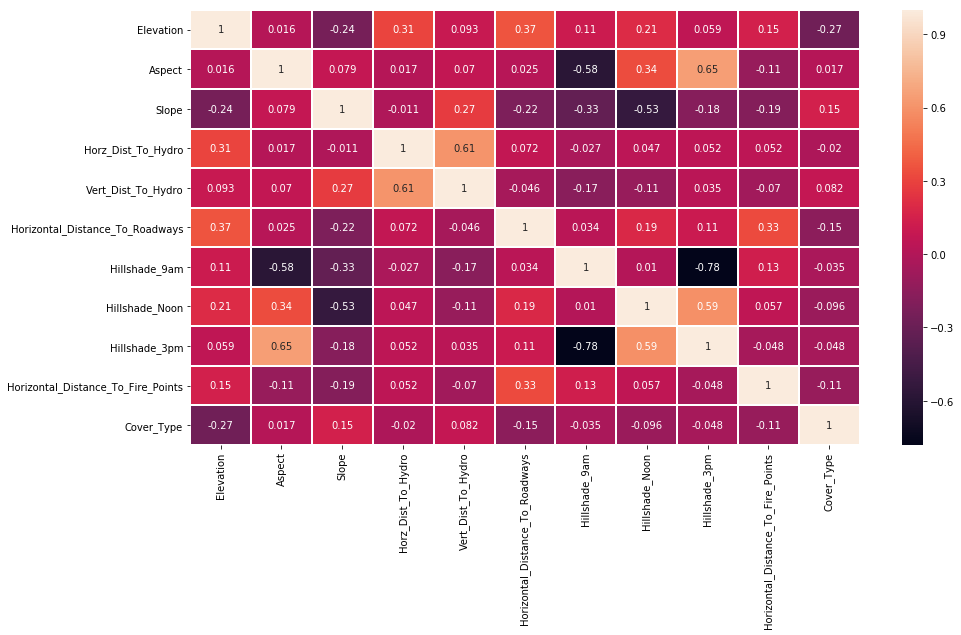

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(df_continous.corr(), linecolor='white', linewidths=1, annot=True )

In [23]:
df_binary = df_forest_final.drop(columns=df_continous.columns)
df_binary['Cover_Type'] = df_forest_final['Cover_Type']
df_binary.head()

Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type10  \
0                 0                 0                 0            0   
1                 0                 0                 0            0   
2                 0                 0                 0            0   
3                 0                 0                 0            0   
4                 0                 0                 0            0   

   Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            1            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type16  ...  Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  \
0            0  ...            0            0           0            0   
1            0  ...            0            0           0            0   
2            0  ...            0            0           0            0   
3            0  ...            0            0           0            0   
4            0  ...            0            0           0            0   

   Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  Cover_Type  
0           0           0           0           0           0           5  
1           0           0           0           0           0           5  
2           0           0           0           0           0           2  
3           0           0           0           0           0           2  
4           0           0           0           0           0           5  

[5 rows x 43 columns]

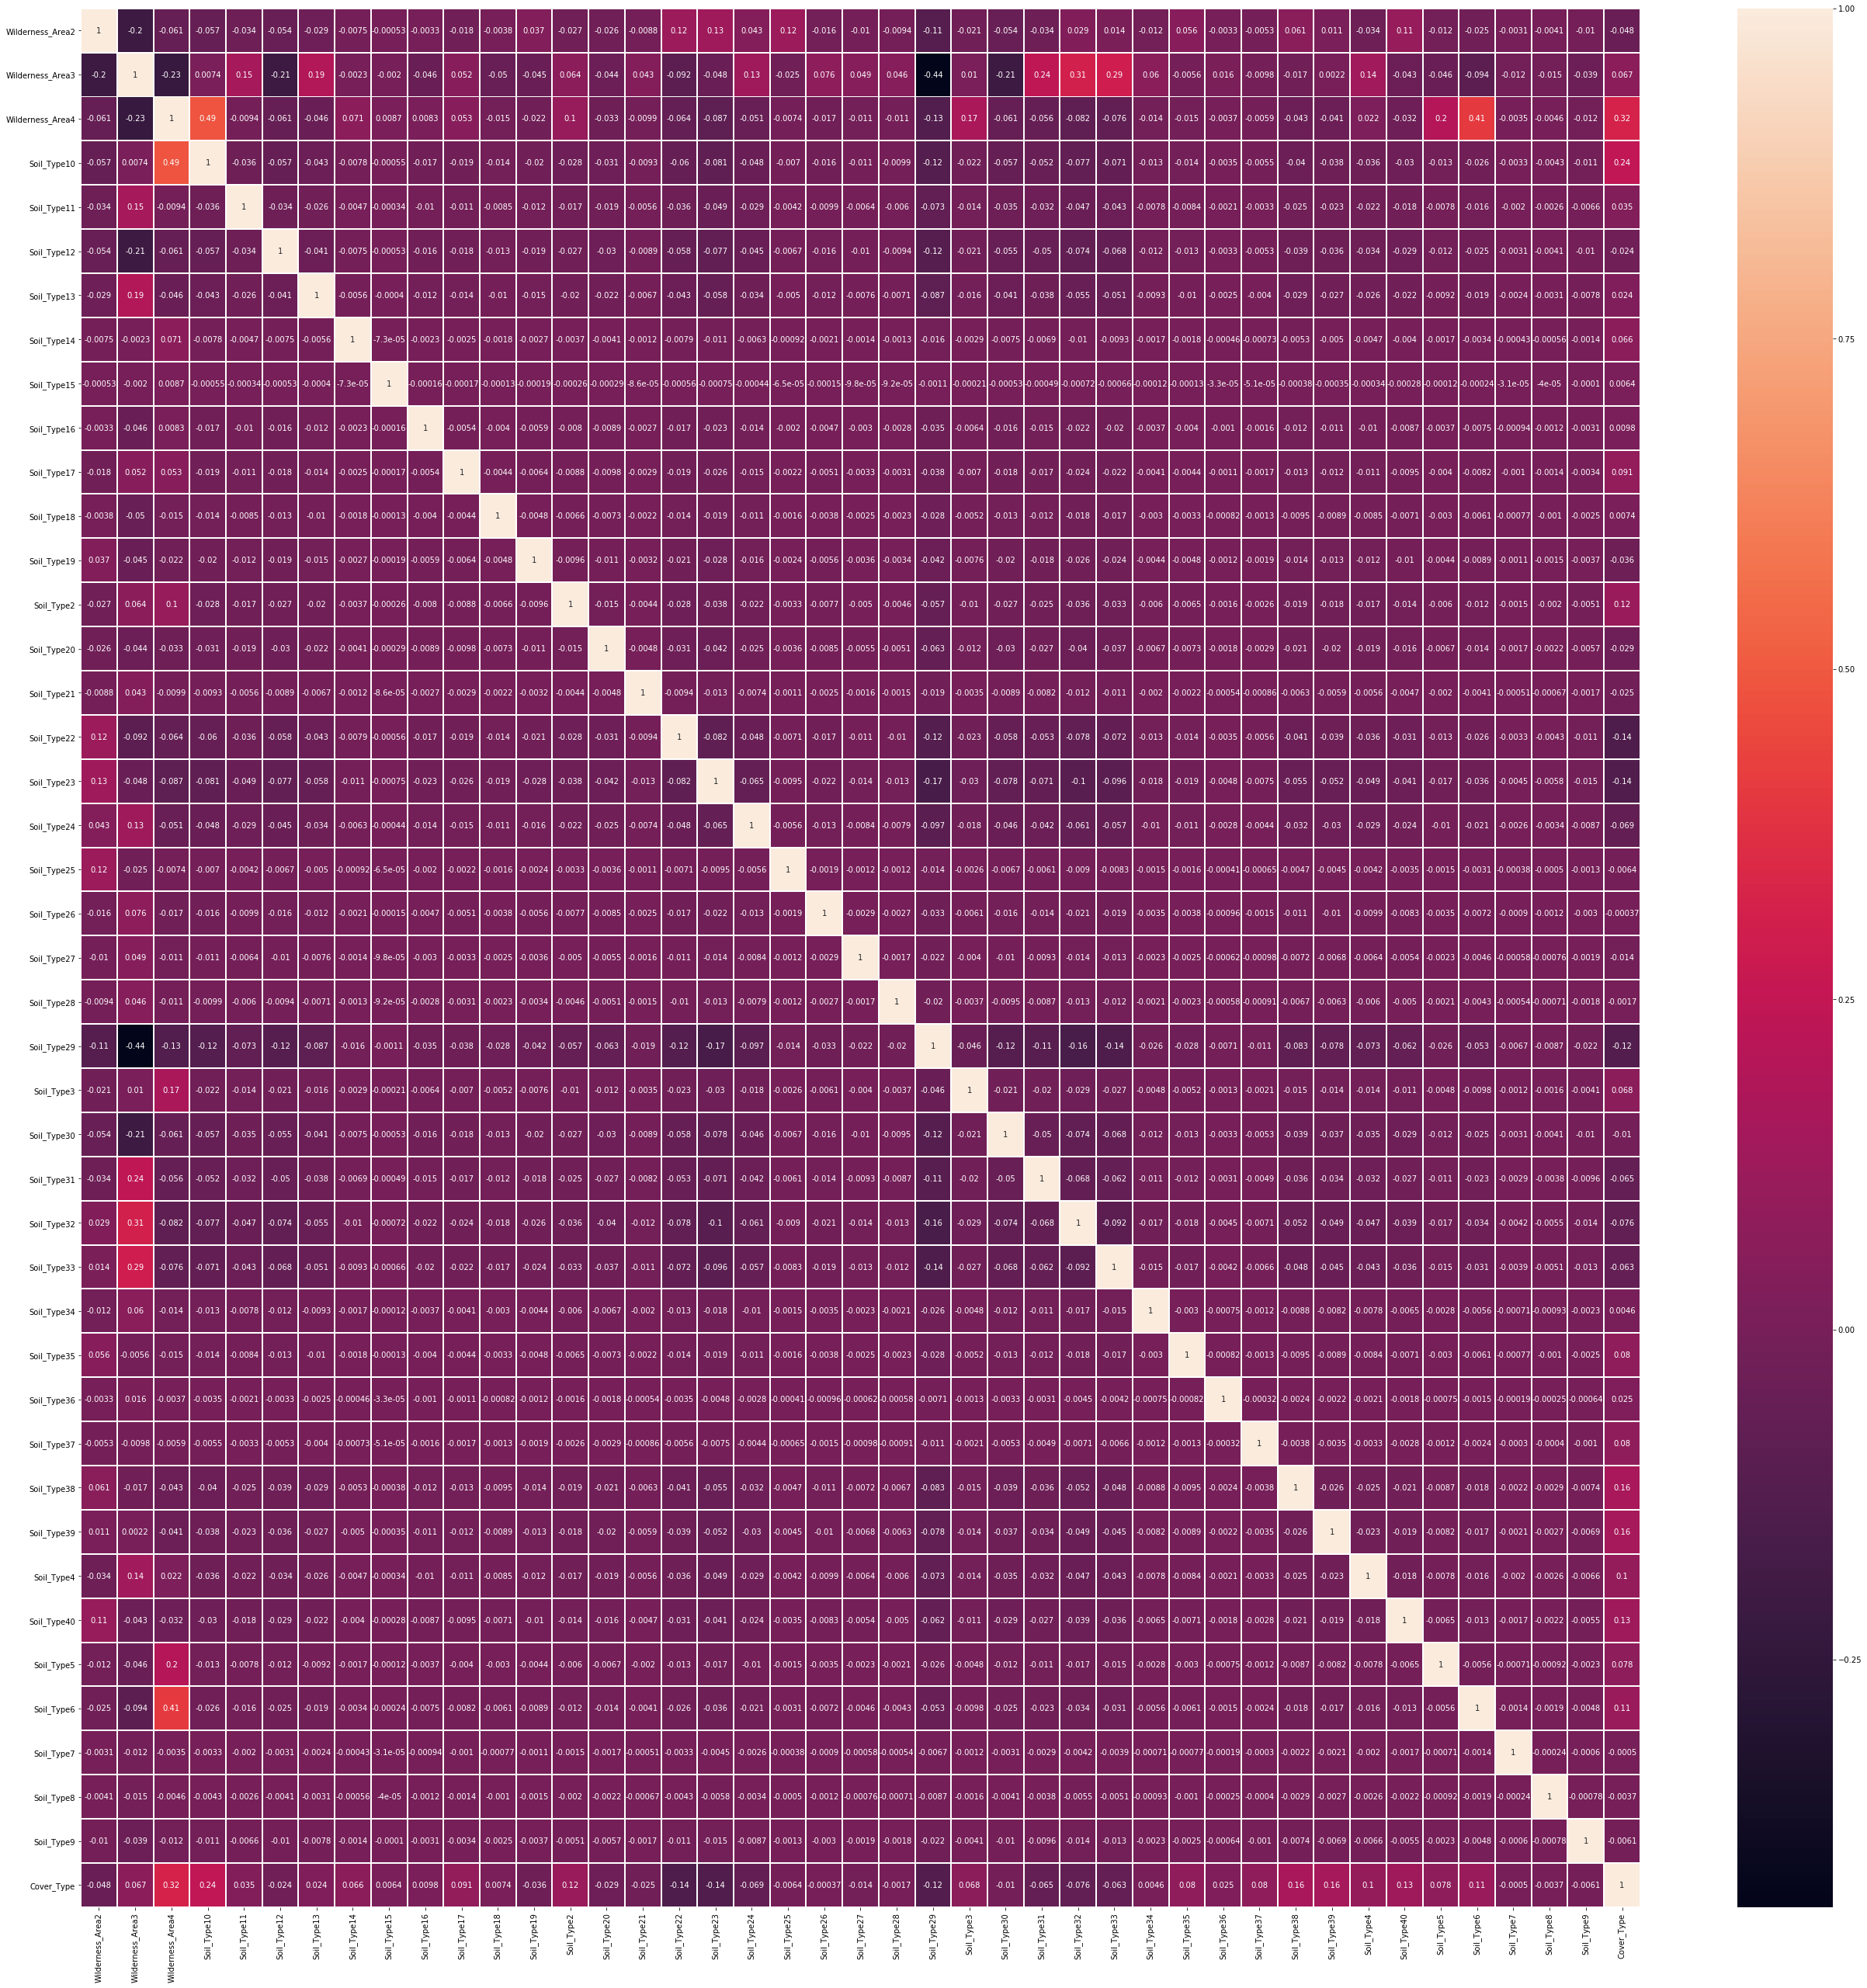

In [69]:
plt.figure(figsize=(45,45))
sns.heatmap(df_binary.corr(), linecolor='white', linewidths=1, annot=True)

The correlation between Independent features seems to be low which is good. 

I will now check the significance of all Independent features in predicting the target Cover type using Logit. I will also test for Multi-collinearity using the VIF scores, and will drop features with high VIF scores.  

In [24]:
target = df_forest_final.Cover_Type
features = df_forest_final.drop(columns=['Cover_Type'])

In [25]:
features

Elevation  Aspect  Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
0            2596      51      3                 258                   0   
1            2590      56      2                 212                  -6   
2            2804     139      9                 268                  65   
3            2785     155     18                 242                 118   
4            2595      45      2                 153                  -1   
...           ...     ...    ...                 ...                 ...   
581007       2396     153     20                  85                  17   
581008       2391     152     19                  67                  12   
581009       2386     159     17                  60                   7   
581010       2384     170     15                  60                   5   
581011       2383     165     13                  60                   4   

        Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                                   510            221             232   
1                                   390            220             235   
2                                  3180            234             238   
3                                  3090            238             238   
4                                   391            220             234   
...                                 ...            ...             ...   
581007                              108            240             237   
581008                               95            240             237   
581009                               90            236             241   
581010                               90            230             245   
581011                               67            231             244   

        Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...  Soil_Type37  \
0                 148                                6279  ...            0   
1                 151                                6225  ...            0   
2                 135                                6121  ...            0   
3                 122                                6211  ...            0   
4                 150                                6172  ...            0   
...               ...                                 ...  ...          ...   
581007            118                                 837  ...            0   
581008            119                                 845  ...            0   
581009            130                                 854  ...            0   
581010            143                                 864  ...            0   
581011            141                                 875  ...            0   

        Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  Soil_Type5  \
0                 0            0           0            0           0   
1                 0            0           0            0           0   
2                 0            0           0            0           0   
3                 0            0           0            0           0   
4                 0            0           0            0           0   
...             ...          ...         ...          ...         ...   
581007            0            0           0            0           0   
581008            0            0           0            0           0   
581009            0            0           0            0           0   
581010            0            0           0            0           0   
581011            0            0           0            0           0   

        Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  
0                0           0           0           0  
1                0           0           0           0  
2                0           0           0           0  
3                0           0           0           0  
4                0           0           0           0  
...            ...         ...        

In [95]:
#X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [96]:
#X_train.shape

###  1. Statistical Significance test 

In [34]:
import statsmodels.discrete.discrete_model as smd

logit = smd.MNLogit(target,features, axis=1)
result = logit.fit(method='nm')

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             Cover_Type   No. Observations:               581012
Model:                        MNLogit   Df Residuals:                   580700
Method:                           MLE   Df Model:                          306
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                 -0.4402
Time:                        02:31:50   Log-Likelihood:            -1.0085e+06
converged:                      False   LL-Null:                   -7.0021e+05
                                        LLR p-value:                     1.000
======================================================================================================
                      Cover_Type=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Elevation                              0.0003   3.39e-05      7.366      0.000       0.000       0.000
Aspect                                      0   5.58e-05          0      1.000      -0.000       0.000
Slope                                       0      0.001          0      1.000      -0.002       0.002
Horz_Dist_To_Hydro                          0   2.95e-05          0      1.000   -5.77e-05    5.77e-05
Vert_Dist_To_Hydro                          0      0.000          0      1.000      -0.000       0.000
Horizontal_Distance_To_Roadways             0   3.82e-06          0      1.000   -7.48e-06    7.48e-06
Hillshade_9am                               0      0.001          0      1.000      -0.001       0.001
Hillshade_Noon                              0      0.001          0      1.000      -0.002       0.002
Hillshade_3pm                               0      0.001          0      1.000      -0.001       0.001
Horizontal_Distance_To_Fire_Points          0   4.06e-06          0      1.000   -7.97e-06    7.97e-06
Wilderness_Area2                            0      0.026          0      1.000      -0.052       0.052
Wilderness_Area3                            0      0.019          0      1.000      -0.038       0.038
Wilderness_Area4                            0      0.037          0      1.000      -0.073       0.073
Soil_Type10                                 0      0.067          0      1.000      -0.132       0.132
Soil_Type11                                 0      0.076          0      1.000      -0.149       0.149
Soil_Type12                                 0      0.075          0      1.000      -0.148       0.148
Soil_Type13                                 0      0.075          0      1.000      -0.147       0.147
Soil_Type14                                 0      0.156          0      1.000      -0.306       0.306
Soil_Type15                                 0      2.022          0      1.000      -3.962       3.962
Soil_Type16                                 0      0.096          0      1.000      -0.188       0.188
Soil_Type17                                 0      0.090          0      1.000      -0.176       0.176
Soil_Type18                                 0      0.108          0      1.000      -0.211       0.211
Soil_Type19                                 0      0.091          0      1.000      -0.179       0.179
Soil_Type2                                  0      0.077          0      1.000      -0.152       0.152
Soil_Type20                                 0      0.081          0      1.000      -0.158       0.158
Soil_Type21                                 0      0.140          0      1.000      -0.275       0.275
Soil_Type22                                 0      0.076          0      1.000      -0.149       0.149
Soil_Type23                                 0      0.074          0      1.000      -0.146       0.146
Soil_Type24                                 0   

The Maximum Iteration limit is reached, so the Statistical test using MNLogit doesnt tell you much in this case.

Let us scale the features and check for multicollinearity as well and remove any features which has high correlation

In [35]:
features_SS = features

In [36]:
#Robust scaler is robust to outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
features_SS_Scaled = scaler.fit_transform(features_SS)
features_SS_Scaled

array([[-1.1299435 , -0.37623762, -1.11111111, ...,  0.        ,
         0.        ,  0.        ],
       [-1.14689266, -0.35148515, -1.22222222, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54237288,  0.05940594, -0.44444444, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.72316384,  0.15841584,  0.44444444, ...,  0.        ,
         0.        ,  0.        ],
       [-1.72881356,  0.21287129,  0.22222222, ...,  0.        ,
         0.        ,  0.        ],
       [-1.73163842,  0.18811881,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [37]:
df_features_SS = pd.DataFrame(features_SS_Scaled, columns=features_SS.columns)
df_features_SS.head()

Elevation    Aspect     Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
0  -1.129944 -0.376238 -1.111111            0.144928           -0.483871   
1  -1.146893 -0.351485 -1.222222           -0.021739           -0.580645   
2  -0.542373  0.059406 -0.444444            0.181159            0.564516   
3  -0.596045  0.138614  0.555556            0.086957            1.419355   
4  -1.132768 -0.405941 -1.222222           -0.235507           -0.500000   

   Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                        -0.669217       0.090909        0.250000   
1                        -0.723222       0.060606        0.375000   
2                         0.532403       0.484848        0.500000   
3                         0.491899       0.606061        0.500000   
4                        -0.722772       0.060606        0.333333   

   Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...  Soil_Type37  \
0       0.102041                            2.994102  ...          0.0   
1       0.163265                            2.958716  ...          0.0   
2      -0.163265                            2.890564  ...          0.0   
3      -0.428571                            2.949541  ...          0.0   
4       0.142857                            2.923984  ...          0.0   

   Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  Soil_Type5  Soil_Type6  \
0          0.0          0.0         0.0          0.0         0.0         0.0   
1          0.0          0.0         0.0          0.0         0.0         0.0   
2          0.0          0.0         0.0          0.0         0.0         0.0   
3          0.0          0.0         0.0          0.0         0.0         0.0   
4          0.0          0.0         0.0          0.0         0.0         0.0   

   Soil_Type7  Soil_Type8  Soil_Type9  
0         0.0         0.0         0.0  
1         0.0         0.0         0.0  
2         0.0         0.0         0.0  
3         0.0         0.0         0.0  
4         0.0         0.0         0.0  

[5 rows x 52 columns]

Lets check for multicollinearity once, as there are 3 features which seem to be highly related as infered from correlation matrix - Hillshade_3pm, Hillshade_9am & Hillshade_Noon

### Multicollinearity & Step Wise Regression

In [39]:
# For each Feature, calculate VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features_SS.values, i) for i in range(df_features_SS.shape[1])]
vif["features"] = df_features_SS.columns
vif.round(1)

VIF Factor                            features
0          4.4                           Elevation
1          2.0                              Aspect
2          7.8                               Slope
3          2.0                  Horz_Dist_To_Hydro
4          2.1                  Vert_Dist_To_Hydro
5          1.8     Horizontal_Distance_To_Roadways
6        113.3                       Hillshade_9am
7         40.9                      Hillshade_Noon
8        148.9                       Hillshade_3pm
9          1.5  Horizontal_Distance_To_Fire_Points
10         1.7                    Wilderness_Area2
11         7.4                    Wilderness_Area3
12         3.7                    Wilderness_Area4
13         2.6                         Soil_Type10
14         1.5                         Soil_Type11
15         1.4                         Soil_Type12
16         1.7                         Soil_Type13
17         1.0                         Soil_Type14
18         1.0                         Soil_Type15
19         1.0                         Soil_Type16
20         1.1                         Soil_Type17
21         1.1                         Soil_Type18
22         1.1                         Soil_Type19
23         1.3                          Soil_Type2
24         1.1                         Soil_Type20
25         1.0                         Soil_Type21
26         1.3                         Soil_Type22
27         1.7                         Soil_Type23
28         1.5                         Soil_Type24
29         1.0                         Soil_Type25
30         1.1                         Soil_Type26
31         1.0                         Soil_Type27
32         1.1                         Soil_Type28
33         1.6                         Soil_Type29
34         1.3                          Soil_Type3
35         1.2                         Soil_Type30
36         1.8                         Soil_Type31
37         2.7                         Soil_Type32
38         2.4                         Soil_Type33
39         1.1                         Soil_Type34
40         1.0                         Soil_Type35
41         1.0                         Soil_Type36
42         1.0                         Soil_Type37
43         1.3                         Soil_Type38
44         1.3                         Soil_Type39
45         1.6                          Soil_Type4
46         1.2                         Soil_Type40
47         1.2                          Soil_Type5
48         1.6                          Soil_Type6
49         1.0                          Soil_Type7
50         1.0                          Soil_Type8
51         1.0                          Soil_Type9

As expected, only the 3 features have VIF factor greater than 5-10, Lets remove the Hillshade_3pm with the highest VIF and again calculate the VIF. 

In [40]:
X = df_features_SS.drop(columns=['Hillshade_9am'])
Y = target

In [41]:
# For each Feature, calculate VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor                            features
0          4.4                           Elevation
1          2.0                              Aspect
2          2.4                               Slope
3          2.0                  Horz_Dist_To_Hydro
4          2.1                  Vert_Dist_To_Hydro
5          1.8     Horizontal_Distance_To_Roadways
6          2.8                      Hillshade_Noon
7          2.6                       Hillshade_3pm
8          1.5  Horizontal_Distance_To_Fire_Points
9          1.7                    Wilderness_Area2
10         7.4                    Wilderness_Area3
11         3.7                    Wilderness_Area4
12         2.6                         Soil_Type10
13         1.4                         Soil_Type11
14         1.3                         Soil_Type12
15         1.6                         Soil_Type13
16         1.0                         Soil_Type14
17         1.0                         Soil_Type15
18         1.0                         Soil_Type16
19         1.1                         Soil_Type17
20         1.1                         Soil_Type18
21         1.0                         Soil_Type19
22         1.3                          Soil_Type2
23         1.1                         Soil_Type20
24         1.0                         Soil_Type21
25         1.2                         Soil_Type22
26         1.5                         Soil_Type23
27         1.5                         Soil_Type24
28         1.0                         Soil_Type25
29         1.1                         Soil_Type26
30         1.0                         Soil_Type27
31         1.0                         Soil_Type28
32         1.3                         Soil_Type29
33         1.3                          Soil_Type3
34         1.1                         Soil_Type30
35         1.7                         Soil_Type31
36         2.5                         Soil_Type32
37         2.3                         Soil_Type33
38         1.1                         Soil_Type34
39         1.0                         Soil_Type35
40         1.0                         Soil_Type36
41         1.0                         Soil_Type37
42         1.3                         Soil_Type38
43         1.2                         Soil_Type39
44         1.5                          Soil_Type4
45         1.2                         Soil_Type40
46         1.1                          Soil_Type5
47         1.6                          Soil_Type6
48         1.0                          Soil_Type7
49         1.0                          Soil_Type8
50         1.0                          Soil_Type9

Perfect!

In [42]:
X.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13',
       'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17',
       'Soil_Type18', 'Soil_Type19', 'Soil_Type2', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type3', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type4', 'Soil_Type40', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9'],
      dtype='object')

This is out first set of selected Features. Now I will try some more features selection techniques and select features for each method and do modelling on each of them to see which works the best for my case.

### 2. Univariate Feature Selection using Mutual Info Classif 

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(df_features_SS, target, test_size=0.3, random_state=42)

In [100]:
X_train.head()

Elevation    Aspect     Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
110220  -1.064972  0.985149 -0.888889           -0.572464           -0.403226   
363425   0.423729 -0.237624 -0.222222           -0.155797            0.435484   
111410   0.036723  0.717822 -0.111111            1.300725            0.048387   
552313  -0.333333  0.425743  1.444444           -0.547101            0.080645   
107881   0.485876 -0.450495 -0.777778           -0.094203           -0.064516   

        Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
110220                        -0.516652      -0.363636        0.333333   
363425                        -0.424392       0.484848       -0.250000   
111410                         1.574257      -0.878788        0.708333   
552313                         0.432493      -0.939394        1.125000   
107881                         0.491449       0.060606        0.000000   

        Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...  Soil_Type37  \
110220       0.469388                            0.004587  ...          0.0   
363425      -0.530612                           -0.403014  ...          0.0   
111410       1.040816                           -0.253604  ...          0.0   
552313       0.959184                           -0.256881  ...          0.0   
107881      -0.020408                            1.749672  ...          0.0   

        Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  Soil_Type5  \
110220          0.0          0.0         0.0          0.0         0.0   
363425          0.0          0.0         0.0          0.0         0.0   
111410          0.0          0.0         0.0          0.0         0.0   
552313          0.0          0.0         0.0          0.0         0.0   
107881          0.0          0.0         0.0          0.0         0.0   

        Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  
110220         0.0         0.0         0.0         0.0  
363425         0.0         0.0         0.0         0.0  
111410         0.0         0.0         0.0         0.0  
552313         0.0         0.0         0.0         0.0  
107881         0.0         0.0         0.0         0.0  

[5 rows x 52 columns]

In [103]:
#Mutual Info Classif test 
fselect1 = SelectKBest(mutual_info_classif, k=26)
train = fselect1.fit_transform(X_train, Y_train)
fselect1.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True, False, False, False])

In [105]:
feature_index = fselect1.get_support()
feature_names = df_features_SS.columns[feature_index]
feature_names

Index(['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type12',
       'Soil_Type2', 'Soil_Type22', 'Soil_Type23', 'Soil_Type29', 'Soil_Type3',
       'Soil_Type30', 'Soil_Type38', 'Soil_Type39', 'Soil_Type4',
       'Soil_Type40', 'Soil_Type6'],
      dtype='object')

This is the second set of selected features.

### 3. Recursive feature Elimination with Cross-Validation

In [104]:
#To be run again 

In [185]:
logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
rfe_logistic = RFECV(estimator=logistic, step=5, cv= 10)
rfe_logistic.fit_transform(X_train, Y_train)

array([[2779,   17,   -6,  205,  254,  179],
       [2586,   19,   65,  186,  204,  153],
       [3055,    5,   -3,  217,  245,  164],
       ...,
       [3266,    7,   75,  213,  227,  151],
       [3246,    5,    2,  225,  230,  139],
       [3047,    7,   17,  201,  241,  179]], dtype=int64)

In [186]:
rfe_logistic.support_

array([ True, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [188]:
rfe_ranks = rfe_logistic.ranking_
rfe_ranks

array([ 1,  2,  1,  2,  1,  2,  1,  1,  1,  2,  5,  3,  3,  4,  6,  3,  5,
        9,  9,  7,  9,  7,  4,  7,  8,  3,  3,  6, 10,  8,  8, 10,  2,  7,
        5,  6,  5,  5,  9,  7, 10,  9,  4,  4,  4,  6,  8,  6, 10, 10,  8])

In [209]:
feature_idx1 = rfe_logistic.support_
feature_names1 = df_features_SS.columns[feature_idx1]
feature_names1

Index(['Elevation', 'Slope', 'Vert_Dist_To_Hydro', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm'],
      dtype='object')

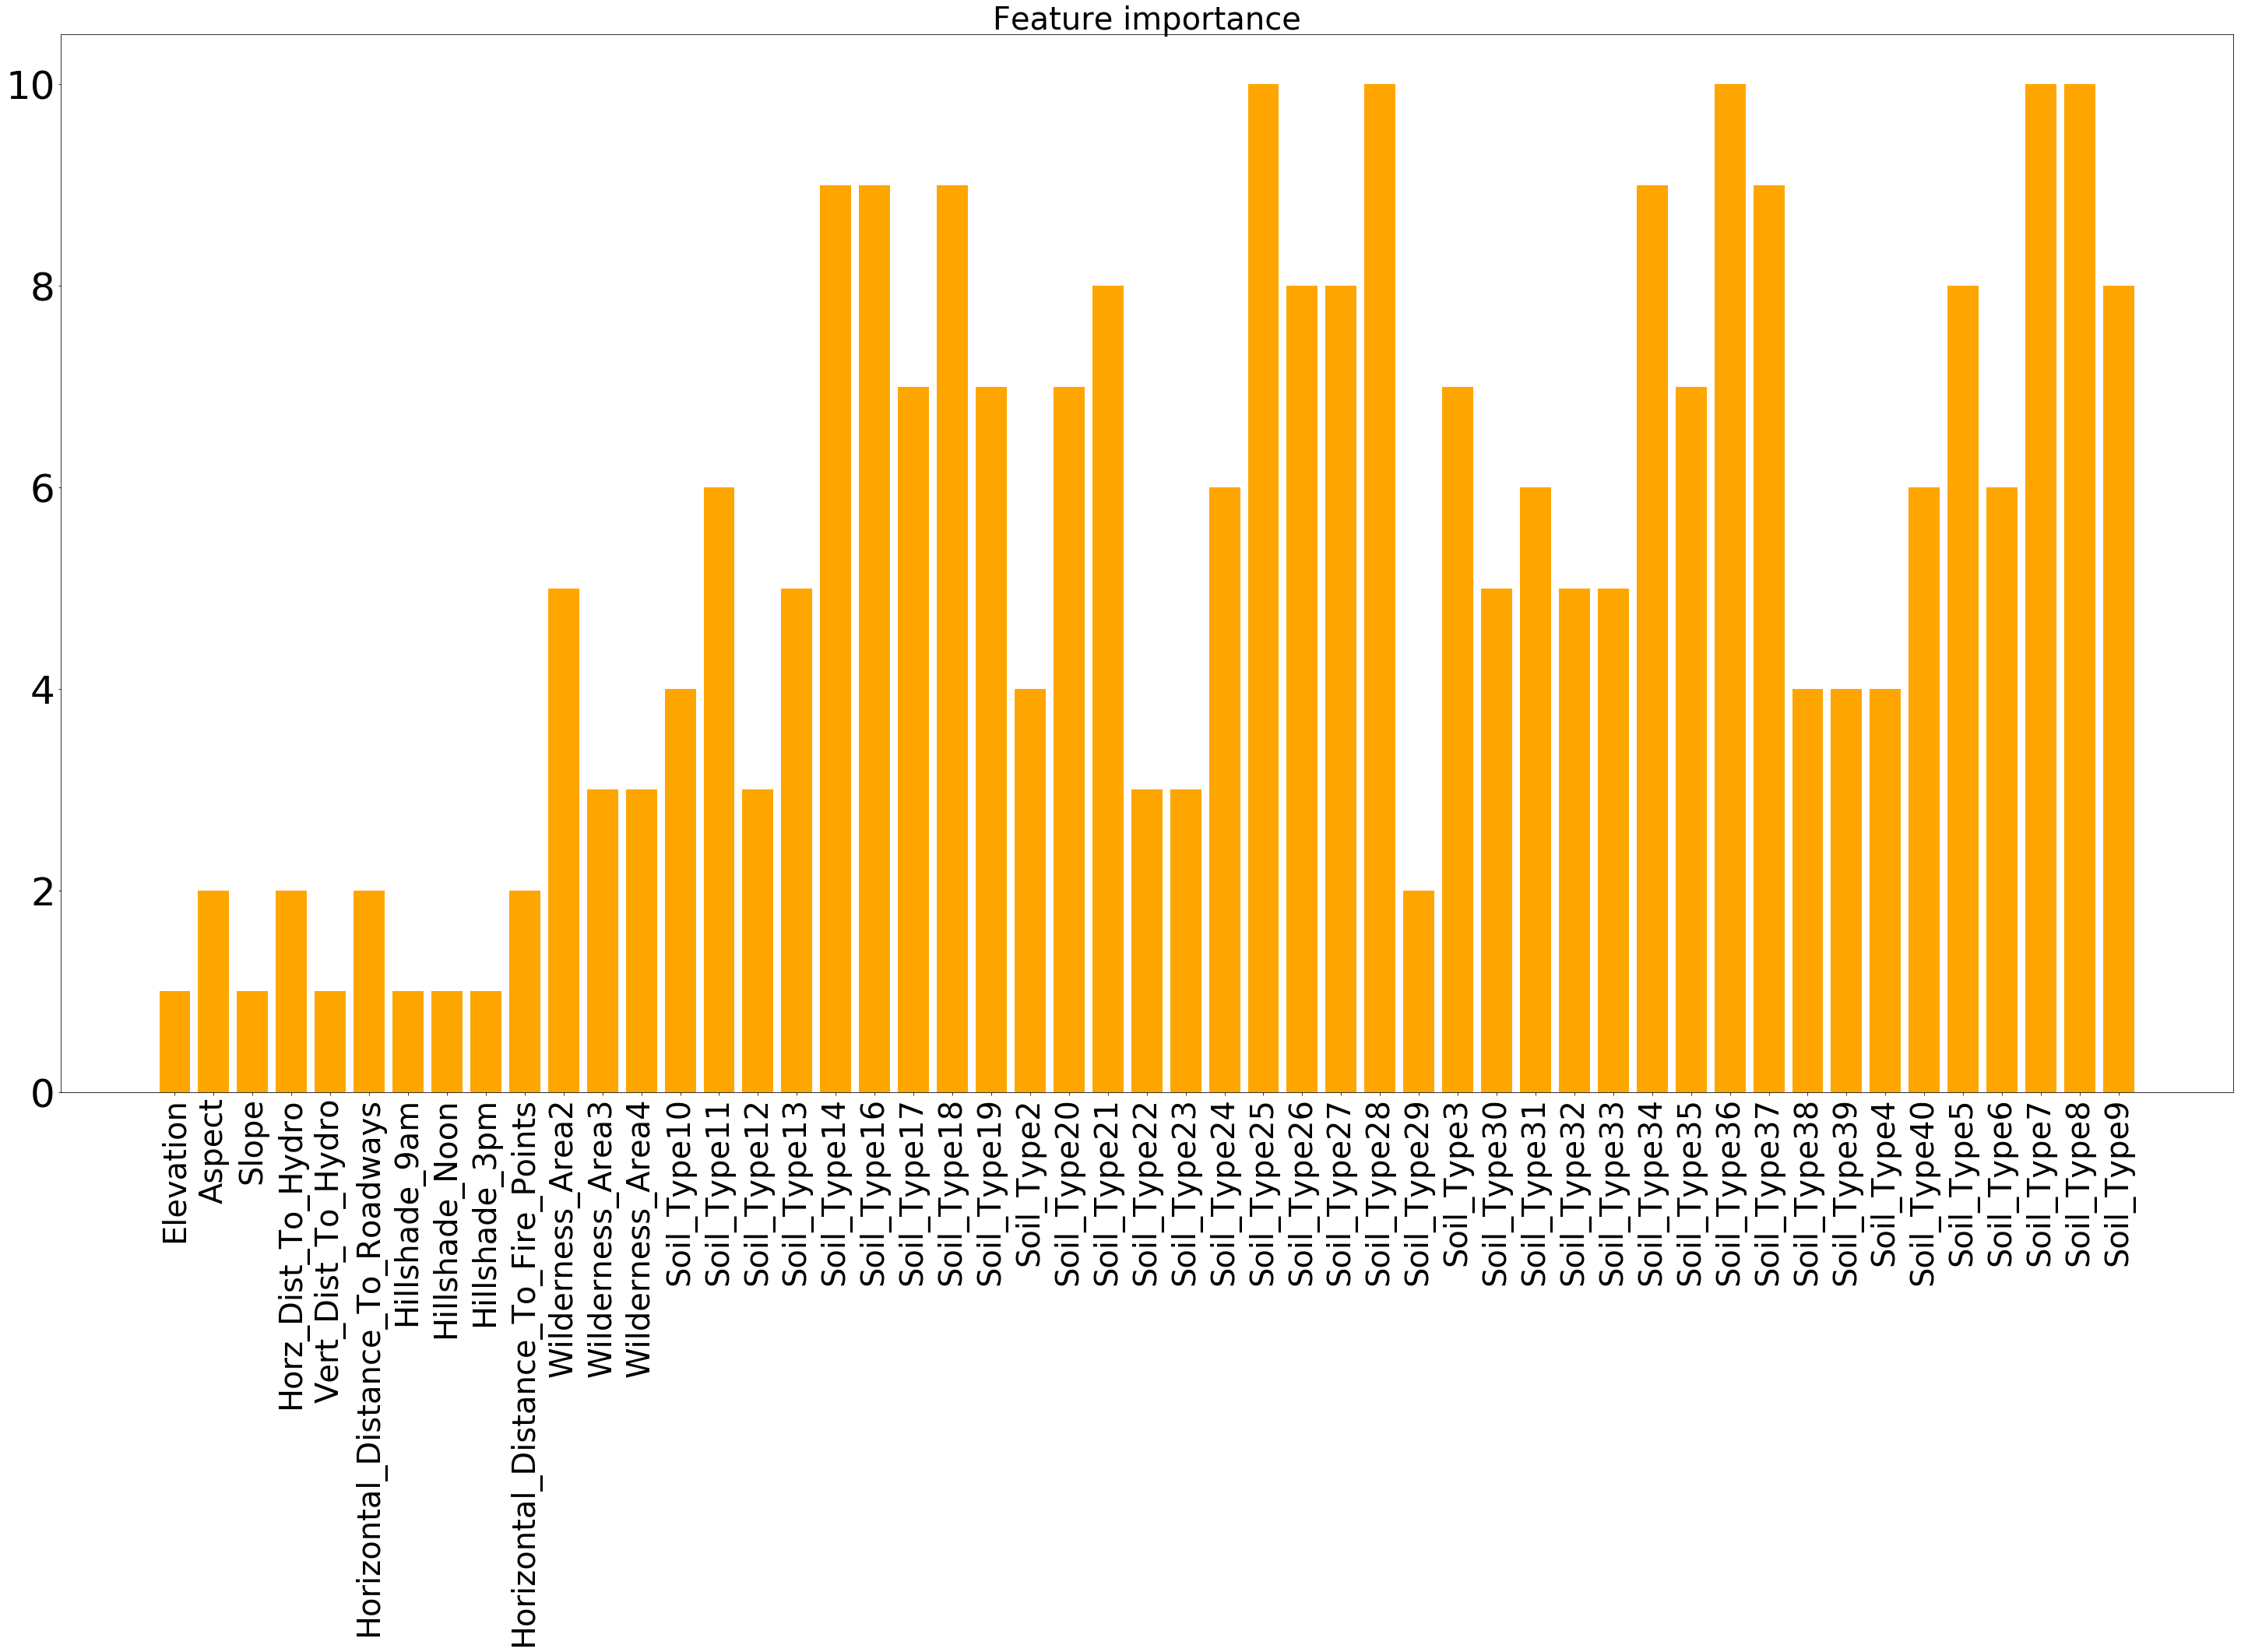

In [192]:
params = {'axes.labelsize': 280,'axes.titlesize':40, 'legend.fontsize': 18, 'xtick.labelsize': 40, 'ytick.labelsize': 50}
plt.figure(figsize=(50,25))
plt.rcParams.update(params)
ax = plt.bar(range(X_train.shape[1]), rfe_ranks, color='orange', align = 'center')
ax = plt.title('Feature importance')
ax = plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.show()

In [193]:
#Feature Selection using Feature Importance in Decision Trees

In [107]:
import time

start = time.time()

rand_forest = RandomForestClassifier(n_estimators=10, random_state=42)
rfe_rf = RFECV(estimator=rand_forest, step=1, cv=5)
rfe_rf.fit_transform(X_train, Y_train)

end = time.time()

In [108]:
print('Time Taken : '+ str(end - start))

Time Taken : 2375.9609591960907


In [109]:
rfe_rf

RFECV(cv=5,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [110]:
rfe_rf.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True,  True, False, False, False, False,  True, False,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False])

In [111]:
ref_rf_ranks = rfe_rf.ranking_

In [112]:
ref_rf_ranks

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  2,
       15, 25, 10,  5, 18,  9,  1,  6, 11,  1,  1,  1, 20, 17, 12, 19,  1,
        4,  1,  1,  1,  1, 13,  8, 21, 16,  1,  1,  1,  1, 14,  7, 24, 23,
       22])

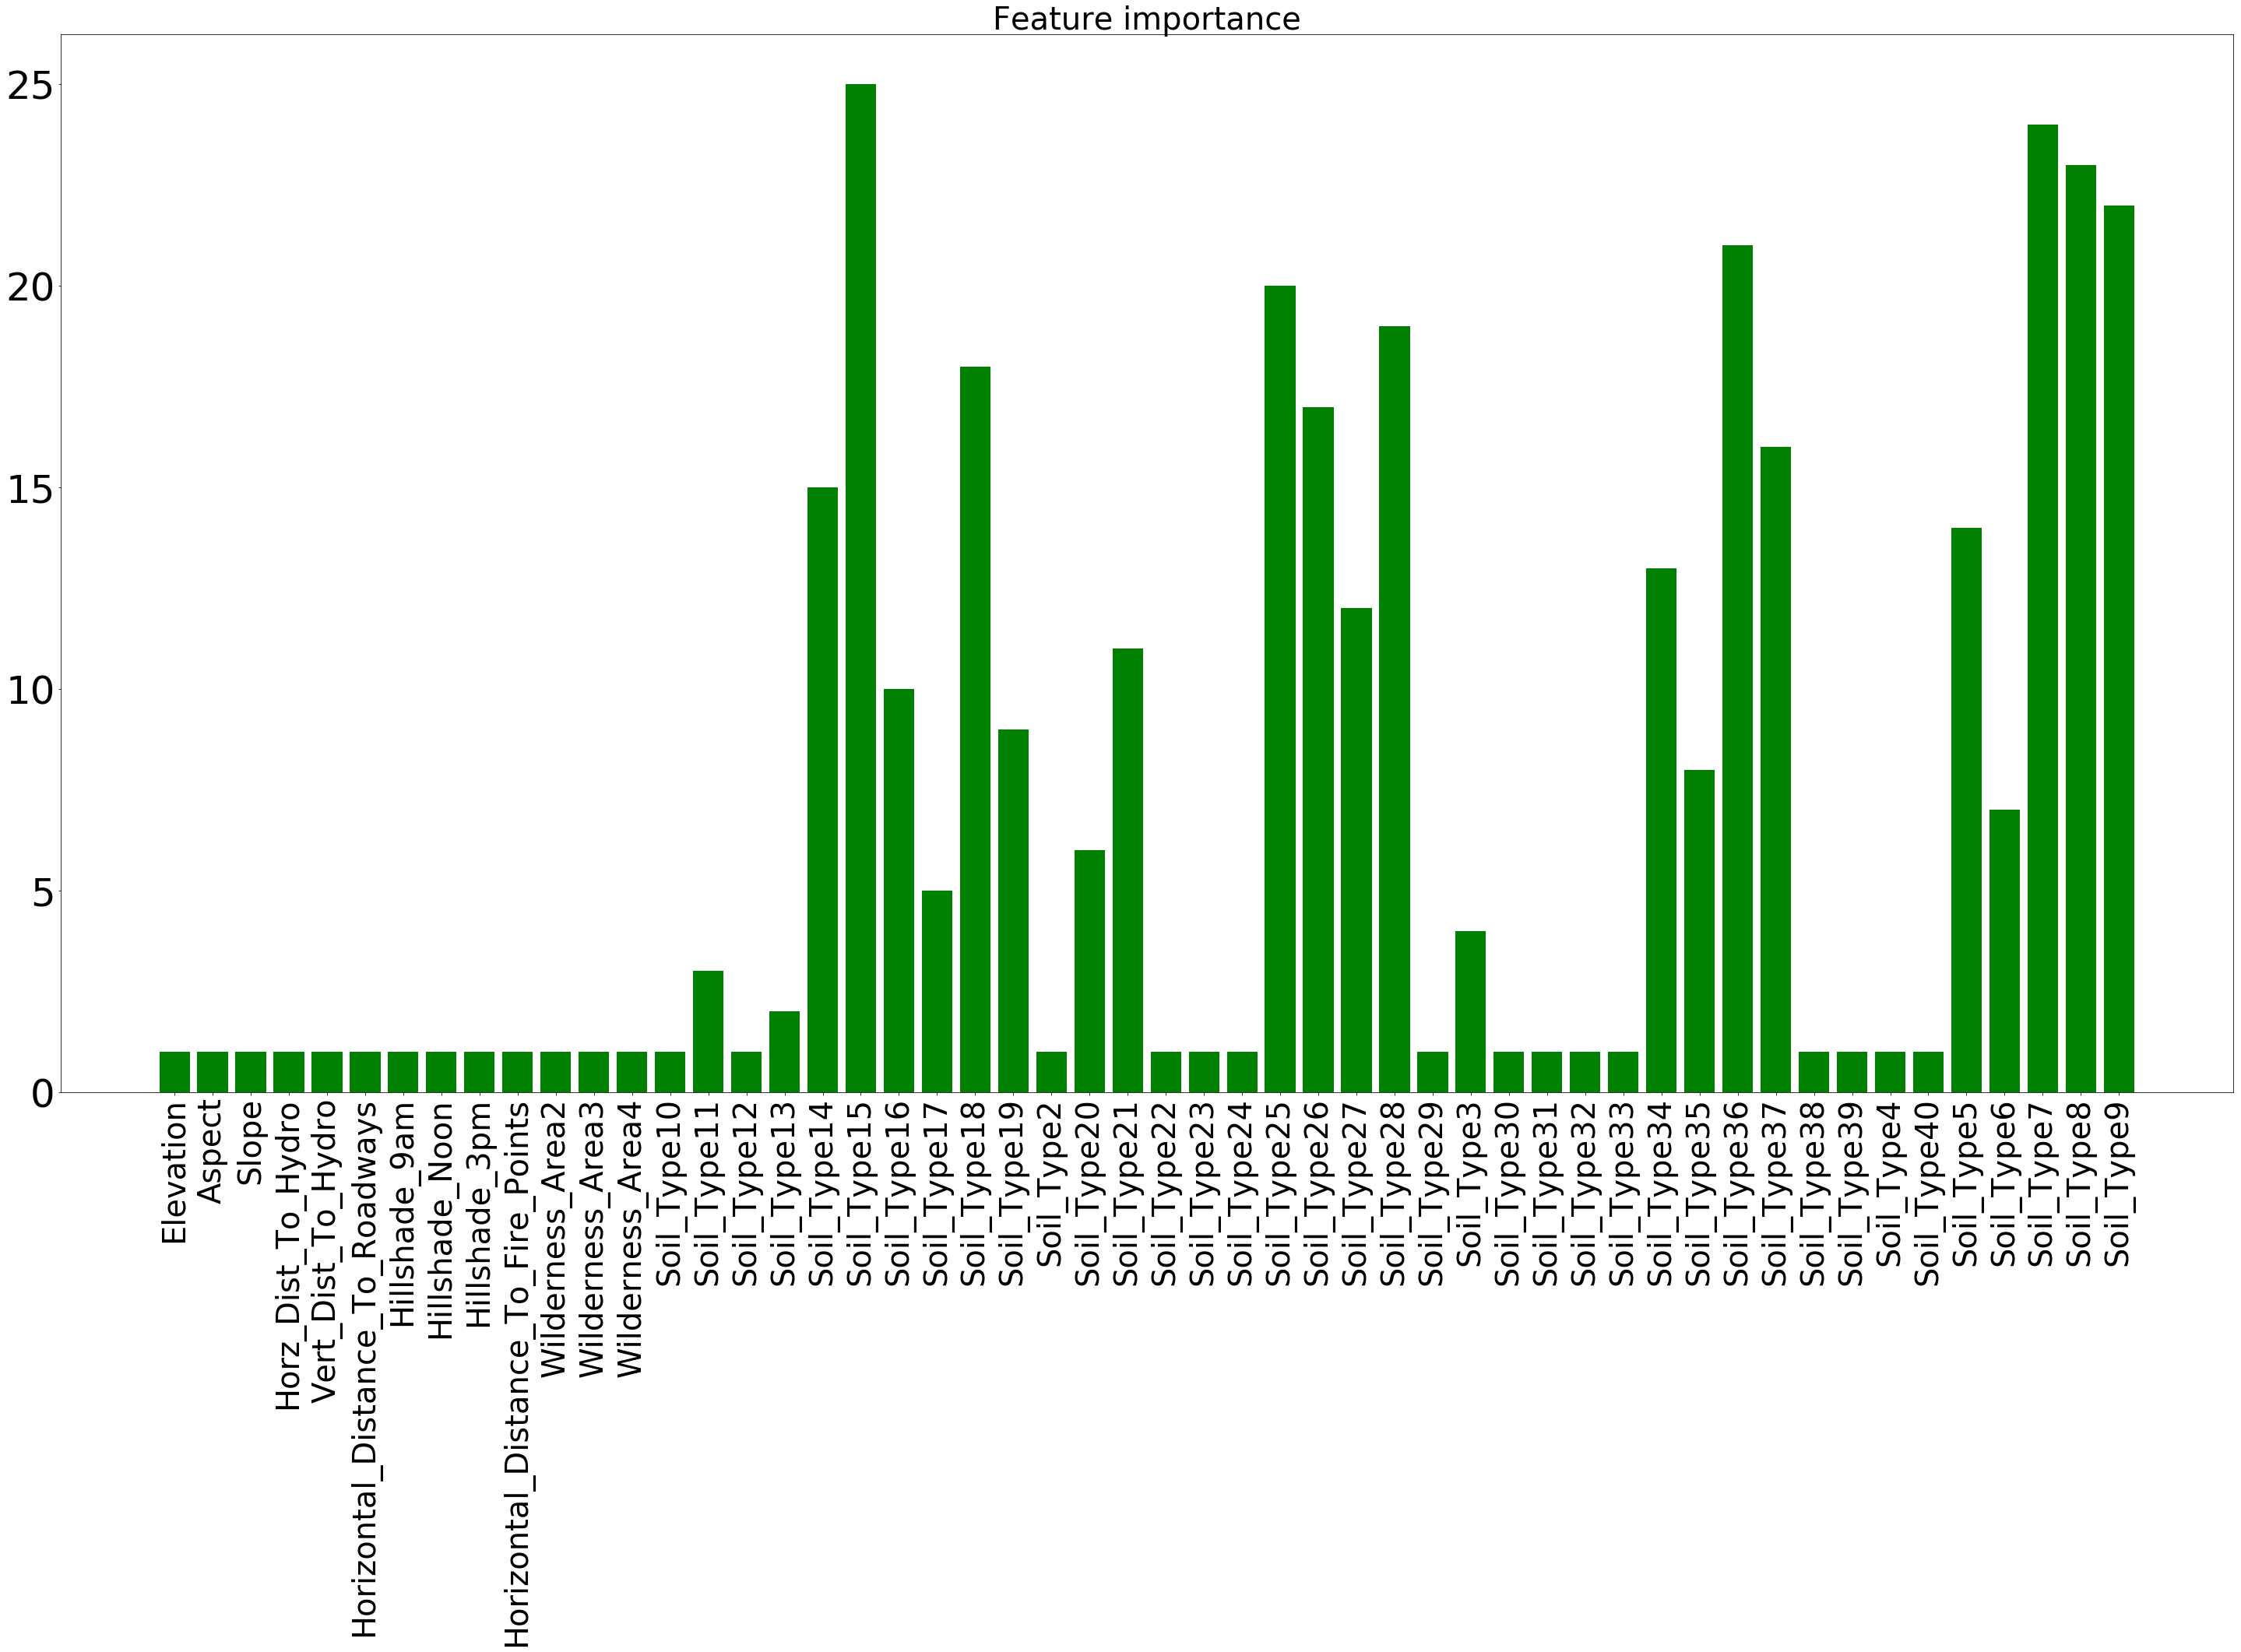

In [113]:
params = {'axes.labelsize': 280,'axes.titlesize':40, 'legend.fontsize': 18, 'xtick.labelsize': 40, 'ytick.labelsize': 50}
plt.figure(figsize=(50,25))
plt.rcParams.update(params)
ax = plt.bar(range(X_train.shape[1]), ref_rf_ranks, color='green', align = 'center')
ax = plt.title('Feature importance')
ax = plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.show()

In [115]:
feature_idx2 = rfe_rf.support_
feature_names2 = df_features_SS.columns[feature_idx2]
feature_names2

Index(['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type12',
       'Soil_Type2', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type38', 'Soil_Type39', 'Soil_Type4',
       'Soil_Type40'],
      dtype='object')

This is my 3rd set of selected features after feature selection

### 4. SelectFromModel - This is a meta transformer for selecting features based on importance.  

In [116]:
xgb = XGBClassifier()
select_xgb = SelectFromModel(xgb, threshold='median')
select_xgb

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
        norm_order=1, prefit=False, threshold='median')

In [117]:
select_xgb.fit_transform(X_train, Y_train)

array([[-1.06497175,  0.98514851, -0.57246377, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.42372881, -0.23762376, -0.1557971 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03672316,  0.71782178,  1.30072464, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.44350282,  0.79207921,  0.42391304, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19491525,  1.09405941, -0.34057971, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07062147, -0.5       , -0.57246377, ...,  0.        ,
         0.        ,  0.        ]])

In [119]:
feature_idx3 = select_xgb.get_support()
feature_names3 = df_features_SS.columns[feature_idx3]
feature_names3

Index(['Elevation', 'Aspect', 'Horz_Dist_To_Hydro', 'Vert_Dist_To_Hydro',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type2', 'Soil_Type22', 'Soil_Type29', 'Soil_Type3',
       'Soil_Type30', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type38', 'Soil_Type39', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6'],
      dtype='object')

### 5. Feature Selection using Feature Importance

In [175]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(X_train, Y_train)
importance = ext.feature_importances_
importance

array([1.96739954e-01, 5.12177091e-02, 3.87444820e-02, 6.37890685e-02,
       5.87502576e-02, 1.09473369e-01, 4.47968946e-02, 4.65841795e-02,
       4.40866110e-02, 1.06665892e-01, 9.39371635e-03, 1.75240267e-02,
       3.50334764e-02, 1.60896925e-02, 3.50250050e-03, 1.24160518e-02,
       4.76846507e-03, 6.55700989e-04, 5.08929591e-06, 8.15598674e-04,
       2.23667673e-03, 5.73125225e-04, 1.21618791e-03, 1.09758476e-02,
       1.65006988e-03, 1.40425026e-03, 1.87466494e-02, 1.37392044e-02,
       3.97061981e-03, 2.78354994e-04, 5.66601156e-04, 9.46593738e-04,
       2.83296944e-04, 4.43645576e-03, 3.54189327e-03, 2.88419989e-03,
       3.17368842e-03, 4.11452317e-03, 3.79456567e-03, 7.98395918e-04,
       2.30739637e-03, 1.06663438e-04, 7.88783970e-04, 1.41715973e-02,
       1.35180488e-02, 1.61052629e-02, 6.09114078e-03, 7.91961838e-04,
       5.51515358e-03, 3.21761816e-05, 4.46304446e-05, 1.43248371e-04])

In [177]:
ext.estimators_

[ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1242447189,
           splitter='random'),
 ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=365982298,
           splitter='random'),
 ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=529432149,
           split

In [179]:
indices = np.argsort(importance)[::-1]
feature_names5 = df_features_SS.columns[indices]
feature_names5


Index(['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Aspect', 'Hillshade_Noon', 'Hillshade_9am',
       'Hillshade_3pm', 'Slope', 'Wilderness_Area4', 'Soil_Type22',
       'Wilderness_Area3', 'Soil_Type4', 'Soil_Type10', 'Soil_Type38',
       'Soil_Type23', 'Soil_Type39', 'Soil_Type12', 'Soil_Type2',
       'Wilderness_Area2', 'Soil_Type40', 'Soil_Type6', 'Soil_Type13',
       'Soil_Type29', 'Soil_Type32', 'Soil_Type24', 'Soil_Type33',
       'Soil_Type3', 'Soil_Type11', 'Soil_Type31', 'Soil_Type30',
       'Soil_Type35', 'Soil_Type17', 'Soil_Type20', 'Soil_Type21',
       'Soil_Type19', 'Soil_Type27', 'Soil_Type16', 'Soil_Type34',
       'Soil_Type5', 'Soil_Type37', 'Soil_Type14', 'Soil_Type18',
       'Soil_Type26', 'Soil_Type28', 'Soil_Type25', 'Soil_Type9',
       'Soil_Type36', 'Soil_Type8', 'Soil_Type7', 'Soil_Type15'],
      dtype='object')

Below are the final Selected 4 set of Features after Feature Selection

In [23]:
#Feature Selection 

features_selected1 = ['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13',
       'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17',
       'Soil_Type18', 'Soil_Type19', 'Soil_Type2', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type3', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type4', 'Soil_Type40', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9']

features_selected2 = ['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type12',
       'Soil_Type2', 'Soil_Type22', 'Soil_Type23', 'Soil_Type29', 'Soil_Type3',
       'Soil_Type30', 'Soil_Type38', 'Soil_Type39', 'Soil_Type4',
       'Soil_Type40', 'Soil_Type6']



features_selected3 = ['Elevation', 'Aspect', 'Slope', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type12',
       'Soil_Type2', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type38', 'Soil_Type39', 'Soil_Type4',
       'Soil_Type40']


features_selected4 = ['Elevation', 'Aspect', 'Horz_Dist_To_Hydro', 'Vert_Dist_To_Hydro',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type2', 'Soil_Type22', 'Soil_Type29', 'Soil_Type3',
       'Soil_Type30', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type38', 'Soil_Type39', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6']



Taking few subset of features from Extra tree classifier as per the importance ranking

In [29]:
features_selected6 = ['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Aspect', 'Hillshade_Noon', 'Hillshade_9am',
        'Slope', 'Wilderness_Area4', 'Soil_Type22',
       'Wilderness_Area3', 'Soil_Type4', 'Soil_Type10', 'Soil_Type38',
       'Soil_Type23', 'Soil_Type39', 'Soil_Type12', 'Soil_Type2',
       'Wilderness_Area2', 'Soil_Type40', 'Soil_Type6']


features_selected7 = ['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Aspect', 'Hillshade_3pm',
        'Slope', 'Wilderness_Area4', 'Soil_Type22',
       'Wilderness_Area3', 'Soil_Type4', 'Soil_Type10', 'Soil_Type38',
       'Soil_Type23', 'Soil_Type39', 'Soil_Type12']


features_selected8 = ['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points',
       'Vert_Dist_To_Hydro', 'Aspect', 'Hillshade_3pm',
        'Slope', 'Wilderness_Area4', 'Soil_Type22',
       'Wilderness_Area3', 'Soil_Type4', 'Soil_Type10', 'Soil_Type38',
       'Soil_Type23', 'Soil_Type39']

features_selected9 = ['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points',
       'Vert_Dist_To_Hydro', 'Hillshade_3pm',
        'Slope', 'Wilderness_Area4', 'Soil_Type22',
       'Wilderness_Area3', 'Soil_Type4',
       'Soil_Type39']

features_selected10 = ['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points',
        'Hillshade_3pm',
        'Wilderness_Area4',
       'Wilderness_Area3', 'Soil_Type4',
       'Soil_Type39']



## Predictive Modeling 

Let's apply some Machine Learning algorithms to build models for prediction of Cover Type using the 4 set of features selected above. 

Classification Algorithms - 
1. Random Forest Classifier
2. Logistic Regression for Multinomial Data
3. KNN Classifier
4. XGBoost Classifier

In [25]:
#Preparing the training and testing features from 4 set of selected features

X_train_1 = X_train[features_selected1]
X_train_2 = X_train[features_selected2]
X_train_3 = X_train[features_selected3]
X_train_4 = X_train[features_selected4]

X_test_1 = X_test[features_selected1]
X_test_2 = X_test[features_selected2]
X_test_3 = X_test[features_selected3]
X_test_4 = X_test[features_selected4]

### Random Forest Classifier

In [162]:
rforest = RandomForestClassifier(n_estimators=25)
rforest.fit(X_train, Y_train)
Y_pred = rforest.predict(X_test)

rforest1 = RandomForestClassifier(n_estimators=25)
rforest1.fit(X_train_1, Y_train)
Y_pred1 = rforest1.predict(X_test_1)

rforest2 = RandomForestClassifier(n_estimators=25)
rforest2.fit(X_train_2, Y_train)
Y_pred2 = rforest2.predict(X_test_2)

rforest3 = RandomForestClassifier(n_estimators=25)
rforest3.fit(X_train_3, Y_train)
Y_pred3 = rforest3.predict(X_test_3)

rforest4 = RandomForestClassifier(n_estimators=25)
rforest4.fit(X_train_4, Y_train)
Y_pred4 = rforest4.predict(X_test_4)



Training Accuracy - 

In [163]:
print ("Random forest Model 1 Training Accuracy Score: " ,rforest.score(X_train, Y_train))
print ("Random forest 2 Training Accuracy Score: " ,rforest1.score(X_train_1, Y_train))
print ("Random forest 3 Training Accuracy Score: " ,rforest2.score(X_train_2, Y_train))
print ("Random forest 4 Training Accuracy Score: " ,rforest3.score(X_train_3, Y_train))
print ("Random forest 5 Training Accuracy Score: " ,rforest4.score(X_train_4, Y_train))

Random forest Model 1 Training Accuracy Score:  0.9997713347167992
Random forest 2 Training Accuracy Score:  0.9997934636151735
Random forest 3 Training Accuracy Score:  0.9997664171838272
Random forest 4 Training Accuracy Score:  0.9997737934832853
Random forest 5 Training Accuracy Score:  0.9997959223816596


In [164]:
print ("Random forest Model 1 Testing Accuracy Score: " ,rforest.score(X_test, Y_test))
print ("Random forest 2 Testing Accuracy Score: " ,rforest1.score(X_test_1, Y_test))
print ("Random forest 3 Testing Accuracy Score: " ,rforest2.score(X_test_2, Y_test))
print ("Random forest 4 Testing Accuracy Score: " ,rforest3.score(X_test_3, Y_test))
print ("Random forest 5 Testing Accuracy Score: " ,rforest4.score(X_test_4, Y_test))

Random forest Model 1 Testing Accuracy Score:  0.9472874977051589
Random forest 2 Testing Accuracy Score:  0.9520550302919037
Random forest 3 Testing Accuracy Score:  0.9488996236460437
Random forest 4 Testing Accuracy Score:  0.9498634569487792
Random forest 5 Testing Accuracy Score:  0.9512747842849275


As some of the classes of our target variable have very few data points, we should check the Precision/recall/f1-score instead of just the accuracy. 

In [165]:
print ("Random forest Model 1 Classification Report: ")
print(classification_report(Y_test, Y_pred))
print ("Random forest 2 Classification Report: " )
print(classification_report(Y_test, Y_pred1))
print ("Random forest 3 Classification Report: ")
print(classification_report(Y_test, Y_pred2))
print ("Random forest 4 Classification Report: " )
print(classification_report(Y_test, Y_pred3))
print ("Random forest 4 Classification Report: " )
print(classification_report(Y_test, Y_pred4))

Random forest Model 1 Classification Report: 
             precision    recall  f1-score   support

          1       0.96      0.94      0.95     63556
          2       0.94      0.97      0.95     85078
          3       0.93      0.96      0.94     10638
          4       0.91      0.84      0.88       795
          5       0.93      0.75      0.83      2941
          6       0.93      0.88      0.90      5227
          7       0.97      0.94      0.96      6069

avg / total       0.95      0.95      0.95    174304

Random forest 2 Classification Report: 
             precision    recall  f1-score   support

          1       0.96      0.94      0.95     63556
          2       0.95      0.97      0.96     85078
          3       0.94      0.96      0.95     10638
          4       0.91      0.86      0.89       795
          5       0.93      0.76      0.84      2941
          6       0.93      0.89      0.91      5227
          7       0.97      0.95      0.96      6069

avg / to

In [185]:
#Preparing the training and testing features from 4 set of selected features
X_train_6 = X_train[features_selected6]

X_test_6 = X_test[features_selected6]

rforest6 = RandomForestClassifier(n_estimators=50)
rforest6.fit(X_train_6, Y_train)
Y_pred6 = rforest6.predict(X_test_6)

print ("Random forest Model 1 Classification Report: ")
print(classification_report(Y_test, Y_pred6))

Random forest Model 1 Classification Report: 
             precision    recall  f1-score   support

          1       0.96      0.94      0.95     63556
          2       0.95      0.97      0.96     85078
          3       0.94      0.96      0.95     10638
          4       0.91      0.85      0.88       795
          5       0.94      0.74      0.82      2941
          6       0.94      0.89      0.91      5227
          7       0.98      0.95      0.96      6069

avg / total       0.95      0.95      0.95    174304



In [188]:

X_train_7 = X_train[features_selected7]

X_test_7 = X_test[features_selected7]

rforest7 = RandomForestClassifier(n_estimators=50)
rforest7.fit(X_train_7, Y_train)
Y_pred7 = rforest7.predict(X_test_7)

print ("Random forest Model 7 Classification Report: ")
print(classification_report(Y_test, Y_pred7))

Random forest Model 1 Classification Report: 
             precision    recall  f1-score   support

          1       0.96      0.95      0.96     63556
          2       0.95      0.97      0.96     85078
          3       0.94      0.96      0.95     10638
          4       0.91      0.85      0.88       795
          5       0.93      0.78      0.85      2941
          6       0.94      0.90      0.92      5227
          7       0.98      0.95      0.96      6069

avg / total       0.96      0.96      0.96    174304



In [192]:
#Preparing the training and testing features from 4 set of selected features
X_train_8 = X_train[features_selected8]

X_test_8 = X_test[features_selected8]

rforest8 = RandomForestClassifier(n_estimators=50)
rforest8.fit(X_train_8, Y_train)
Y_pred8 = rforest8.predict(X_test_8)

print ("Random forest Model 8 Classification Report: ")
print(classification_report(Y_test, Y_pred8))

Random forest Model 8 Classification Report: 
             precision    recall  f1-score   support

          1       0.96      0.95      0.96     63556
          2       0.96      0.97      0.96     85078
          3       0.95      0.97      0.96     10638
          4       0.91      0.87      0.89       795
          5       0.94      0.78      0.85      2941
          6       0.94      0.91      0.92      5227
          7       0.97      0.95      0.96      6069

avg / total       0.96      0.96      0.96    174304



In [28]:
#Preparing the training and testing features from 4 set of selected features
X_train_9 = X_train[features_selected9]

X_test_9 = X_test[features_selected9]

rforest9 = RandomForestClassifier(n_estimators=50)
rforest9.fit(X_train_9, Y_train)
Y_pred9 = rforest9.predict(X_test_9)

print ("Random forest Model 9 Classification Report: ")
print(classification_report(Y_test, Y_pred9))

Random forest Model 9 Classification Report: 
             precision    recall  f1-score   support

          1       0.96      0.94      0.95     63556
          2       0.95      0.97      0.96     85078
          3       0.92      0.94      0.93     10638
          4       0.86      0.75      0.80       795
          5       0.93      0.75      0.83      2941
          6       0.92      0.87      0.89      5227
          7       0.97      0.95      0.96      6069

avg / total       0.95      0.95      0.95    174304



In [30]:
#Preparing the training and testing features from 4 set of selected features
X_train_10 = X_train[features_selected10]

X_test_10 = X_test[features_selected10]

rforest10 = RandomForestClassifier(n_estimators=50)
rforest10.fit(X_train_10, Y_train)
Y_pred10 = rforest10.predict(X_test_10)

print ("Random forest Model 10 Classification Report: ")
print(classification_report(Y_test, Y_pred10))

Random forest Model 10 Classification Report: 
             precision    recall  f1-score   support

          1       0.93      0.92      0.93     63556
          2       0.93      0.95      0.94     85078
          3       0.88      0.91      0.89     10638
          4       0.82      0.58      0.68       795
          5       0.89      0.67      0.76      2941
          6       0.86      0.79      0.83      5227
          7       0.96      0.92      0.94      6069

avg / total       0.92      0.92      0.92    174304



The f1-score seems to be good (95%) but we can there is a little overfitting as the training accuracy is 99.97%. 
I will do Hyperparameter Tuning using Grid Search and CrossValidation on the best model. 

### K-Nearest Neighbors

In [166]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train_1, Y_train)
Y_pred1 = knn1.predict(X_test_1)

knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train_2, Y_train)
Y_pred2 = knn2.predict(X_test_2)

knn3 = KNeighborsClassifier(n_neighbors=10)
knn3.fit(X_train_3, Y_train)
Y_pred3 = knn3.predict(X_test_3)

knn4 = KNeighborsClassifier(n_neighbors=10)
knn4.fit(X_train_4, Y_train)
Y_pred4 = knn4.predict(X_test_4)




In [167]:
print ("KNN Model 1 Classification Report: ")
print(classification_report(Y_test, Y_pred))
print ("KNN Model 2 Classification Report: " )
print(classification_report(Y_test, Y_pred1))
print ("KNN Model 3 Classification Report: ")
print(classification_report(Y_test, Y_pred2))
print ("KNN Model 4 Classification Report: " )
print(classification_report(Y_test, Y_pred3))
print ("KNN Model 5 Classification Report: " )
print(classification_report(Y_test, Y_pred4))

KNN Model 1 Classification Report: 
             precision    recall  f1-score   support

          1       0.91      0.92      0.91     63556
          2       0.93      0.93      0.93     85078
          3       0.87      0.90      0.88     10638
          4       0.84      0.68      0.75       795
          5       0.84      0.67      0.75      2941
          6       0.80      0.74      0.77      5227
          7       0.93      0.91      0.92      6069

avg / total       0.91      0.91      0.91    174304

KNN Model 2 Classification Report: 
             precision    recall  f1-score   support

          1       0.91      0.92      0.92     63556
          2       0.93      0.93      0.93     85078
          3       0.88      0.90      0.89     10638
          4       0.86      0.69      0.77       795
          5       0.84      0.69      0.76      2941
          6       0.81      0.75      0.78      5227
          7       0.94      0.91      0.92      6069

avg / total       0.91

### Logistic Regression

In [168]:
logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

logistic1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic1.fit(X_train_1, Y_train)
Y_pred1 = logistic1.predict(X_test_1)

logistic2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic2.fit(X_train_2, Y_train)
Y_pred2 = logistic2.predict(X_test_2)

logistic3 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic3.fit(X_train_3, Y_train)
Y_pred3 = logistic3.predict(X_test_3)

logistic4 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic4.fit(X_train_4, Y_train)
Y_pred4 = logistic4.predict(X_test_4)



In [169]:
print ("Logistic Model 1 Classification Report: ")
print(classification_report(Y_test, Y_pred))
print ("Logistic Model 2 Classification Report: " )
print(classification_report(Y_test, Y_pred1))
print ("Logistic Model 3 Classification Report: ")
print(classification_report(Y_test, Y_pred2))
print ("Logistic Model 4 Classification Report: " )
print(classification_report(Y_test, Y_pred3))
print ("Logistic Model 5 Classification Report: " )
print(classification_report(Y_test, Y_pred4))

Logistic Model 1 Classification Report: 
             precision    recall  f1-score   support

          1       0.71      0.70      0.70     63556
          2       0.75      0.80      0.77     85078
          3       0.67      0.80      0.73     10638
          4       0.56      0.39      0.46       795
          5       0.20      0.01      0.01      2941
          6       0.49      0.25      0.33      5227
          7       0.72      0.56      0.63      6069

avg / total       0.71      0.72      0.71    174304

Logistic Model 2 Classification Report: 
             precision    recall  f1-score   support

          1       0.71      0.70      0.70     63556
          2       0.75      0.80      0.77     85078
          3       0.67      0.80      0.73     10638
          4       0.57      0.39      0.47       795
          5       0.19      0.01      0.01      2941
          6       0.48      0.25      0.32      5227
          7       0.72      0.56      0.63      6069

avg / total 

### XGBoost Classifier 

In [158]:
XG_boost = XGBClassifier(n_estimators=25, max_depth= 5)
XG_boost.fit(X_train, Y_train)
Y_pred = XG_boost.predict(X_test)

XG_boost1 = XGBClassifier(n_estimators=25, max_depth= 5)
XG_boost1.fit(X_train_1, Y_train)
Y_pred1 = XG_boost1.predict(X_test_1)

XG_boost2 = XGBClassifier(n_estimators=25, max_depth= 5)
XG_boost2.fit(X_train_2, Y_train)
Y_pred2 = XG_boost2.predict(X_test_2)

XG_boost3 = XGBClassifier(n_estimators=25, max_depth= 5)
XG_boost3.fit(X_train_3, Y_train)
Y_pred3 = XG_boost3.predict(X_test_3)

XG_boost4 = XGBClassifier(n_estimators=25, max_depth= 5)
XG_boost4.fit(X_train_4, Y_train)
Y_pred4 = XG_boost4.predict(X_test_4)



In [159]:
print ("XGBoost Model 1 Classification Report: ")
print(classification_report(Y_test, Y_pred))
print ("XGBoost Model 2 Classification Report: " )
print(classification_report(Y_test, Y_pred1))
print ("XGBoost Model 3 Classification Report: ")
print(classification_report(Y_test, Y_pred2))
print ("XGBoost Model 4 Classification Report: " )
print(classification_report(Y_test, Y_pred3))
print ("XGBoost Model 4 Classification Report: " )
print(classification_report(Y_test, Y_pred4))

XGBoost Model 1 Classification Report: 
             precision    recall  f1-score   support

          1       0.74      0.73      0.73     63556
          2       0.76      0.82      0.79     85078
          3       0.71      0.85      0.77     10638
          4       0.80      0.63      0.71       795
          5       0.81      0.12      0.21      2941
          6       0.67      0.17      0.27      5227
          7       0.86      0.57      0.68      6069

avg / total       0.75      0.75      0.74    174304

XGBoost Model 2 Classification Report: 
             precision    recall  f1-score   support

          1       0.74      0.73      0.73     63556
          2       0.76      0.82      0.79     85078
          3       0.71      0.85      0.77     10638
          4       0.81      0.63      0.70       795
          5       0.77      0.13      0.22      2941
          6       0.66      0.17      0.27      5227
          7       0.85      0.56      0.68      6069

avg / total   

### Principal Component Analysis 

In [135]:
pca_tar = target

In [133]:
pca_features = df_features_SS
pca_features

Elevation    Aspect     Slope  Horz_Dist_To_Hydro  Vert_Dist_To_Hydro  \
0       -1.129944 -0.376238 -1.111111            0.144928           -0.483871   
1       -1.146893 -0.351485 -1.222222           -0.021739           -0.580645   
2       -0.542373  0.059406 -0.444444            0.181159            0.564516   
3       -0.596045  0.138614  0.555556            0.086957            1.419355   
4       -1.132768 -0.405941 -1.222222           -0.235507           -0.500000   
...           ...       ...       ...                 ...                 ...   
581007  -1.694915  0.128713  0.777778           -0.481884           -0.209677   
581008  -1.709040  0.123762  0.666667           -0.547101           -0.290323   
581009  -1.723164  0.158416  0.444444           -0.572464           -0.370968   
581010  -1.728814  0.212871  0.222222           -0.572464           -0.403226   
581011  -1.731638  0.188119  0.000000           -0.572464           -0.419355   

        Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                             -0.669217       0.090909        0.250000   
1                             -0.723222       0.060606        0.375000   
2                              0.532403       0.484848        0.500000   
3                              0.491899       0.606061        0.500000   
4                             -0.722772       0.060606        0.333333   
...                                 ...            ...             ...   
581007                        -0.850135       0.666667        0.458333   
581008                        -0.855986       0.666667        0.458333   
581009                        -0.858236       0.545455        0.625000   
581010                        -0.858236       0.363636        0.791667   
581011                        -0.868587       0.393939        0.750000   

        Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...  Soil_Type37  \
0            0.102041                            2.994102  ...          0.0   
1            0.163265                            2.958716  ...          0.0   
2           -0.163265                            2.890564  ...          0.0   
3           -0.428571                            2.949541  ...          0.0   
4            0.142857                            2.923984  ...          0.0   
...               ...                                 ...  ...          ...   
581007      -0.510204                           -0.572084  ...          0.0   
581008      -0.489796                           -0.566841  ...          0.0   
581009      -0.265306                           -0.560944  ...          0.0   
581010       0.000000                           -0.554391  ...          0.0   
581011      -0.040816                           -0.547182  ...          0.0   

        Soil_Type38  Soil_Type39  Soil_Type4  Soil_Type40  Soil_Type5  \
0               0.0          0.0         0.0          0.0         0.0   
1               0.0          0.0         0.0          0.0         0.0   
2               0.0          0.0         0.0          0.0         0.0   
3               0.0          0.0         0.0          0.0         0.0   
4               0.0          0.0         0.0          0.0         0.0   
...             ...          ...         ...          ...         ...   
581007          0.0          0.0         0.0          0.0         0.0   
581008          0.0          0.0         0.0          0.0         0.0   
581009          0.0          0.0         0.0          0.0         0.0   
581010          0.0          0.0         0.0          0.0         0.0   
581011          0.0          0.0         0.0          0.0         0.0   

        Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  
0              0.0         0.0         0.0         0.0  
1              0.0         0.0         0.0         0.0  
2              0.0         0.0         0.0         0.0  
3              0.0         0.0         0.0         0.0  
4              0.0         0.0     

In [137]:
pca1 = PCA()
p_comp1 = pca1.fit_transform(pca_features)
p_comp1

array([[-1.58323981e+00, -1.03968129e+00, -3.22879160e-02, ...,
        -2.78816803e-03,  2.45247731e-03, -1.69731836e-05],
       [-1.73276124e+00, -1.02470217e+00, -2.23288114e-01, ...,
        -2.87236231e-03,  2.49227054e-03, -1.42047367e-05],
       [-1.39312097e+00, -6.43247021e-01,  1.01229246e+00, ...,
        -8.81956705e-04,  6.61381697e-04,  1.37941090e-05],
       ...,
       [ 4.59648475e-01, -7.30288155e-01, -1.59673043e+00, ...,
         4.00713938e-04, -1.92844586e-03,  8.53189431e-06],
       [ 2.13059457e-01, -4.45115386e-01, -1.72473045e+00, ...,
         3.81665564e-04, -2.35986026e-03,  4.36120354e-06],
       [ 1.12484709e-01, -5.22590232e-01, -1.69756509e+00, ...,
         2.56132509e-04, -2.58105696e-03,  3.63527728e-06]])

In [138]:
explained_variance=pca1.explained_variance_ratio_
explained_variance

array([1.98986772e-01, 1.94827648e-01, 1.60379921e-01, 1.01111572e-01,
       7.00040977e-02, 4.72643146e-02, 3.84613977e-02, 2.98919628e-02,
       2.90922925e-02, 1.87606523e-02, 1.69281022e-02, 1.14552401e-02,
       9.99435506e-03, 8.08676376e-03, 7.21674594e-03, 6.27896582e-03,
       6.12571606e-03, 5.15981400e-03, 4.86596891e-03, 4.26483361e-03,
       3.96503871e-03, 3.40061757e-03, 3.23455066e-03, 2.65415448e-03,
       2.33950276e-03, 2.24624104e-03, 1.92218862e-03, 1.63334363e-03,
       1.40150126e-03, 1.10935829e-03, 9.83250022e-04, 8.37195440e-04,
       7.07714760e-04, 6.55709708e-04, 5.86211279e-04, 4.61625793e-04,
       4.00227455e-04, 3.64937241e-04, 3.20741107e-04, 2.79854383e-04,
       2.67569943e-04, 2.40827401e-04, 2.14453382e-04, 1.92151364e-04,
       1.36555241e-04, 1.08050438e-04, 6.96827957e-05, 4.23991468e-05,
       2.87076472e-05, 2.46843311e-05, 1.31350043e-05, 6.82221648e-07])

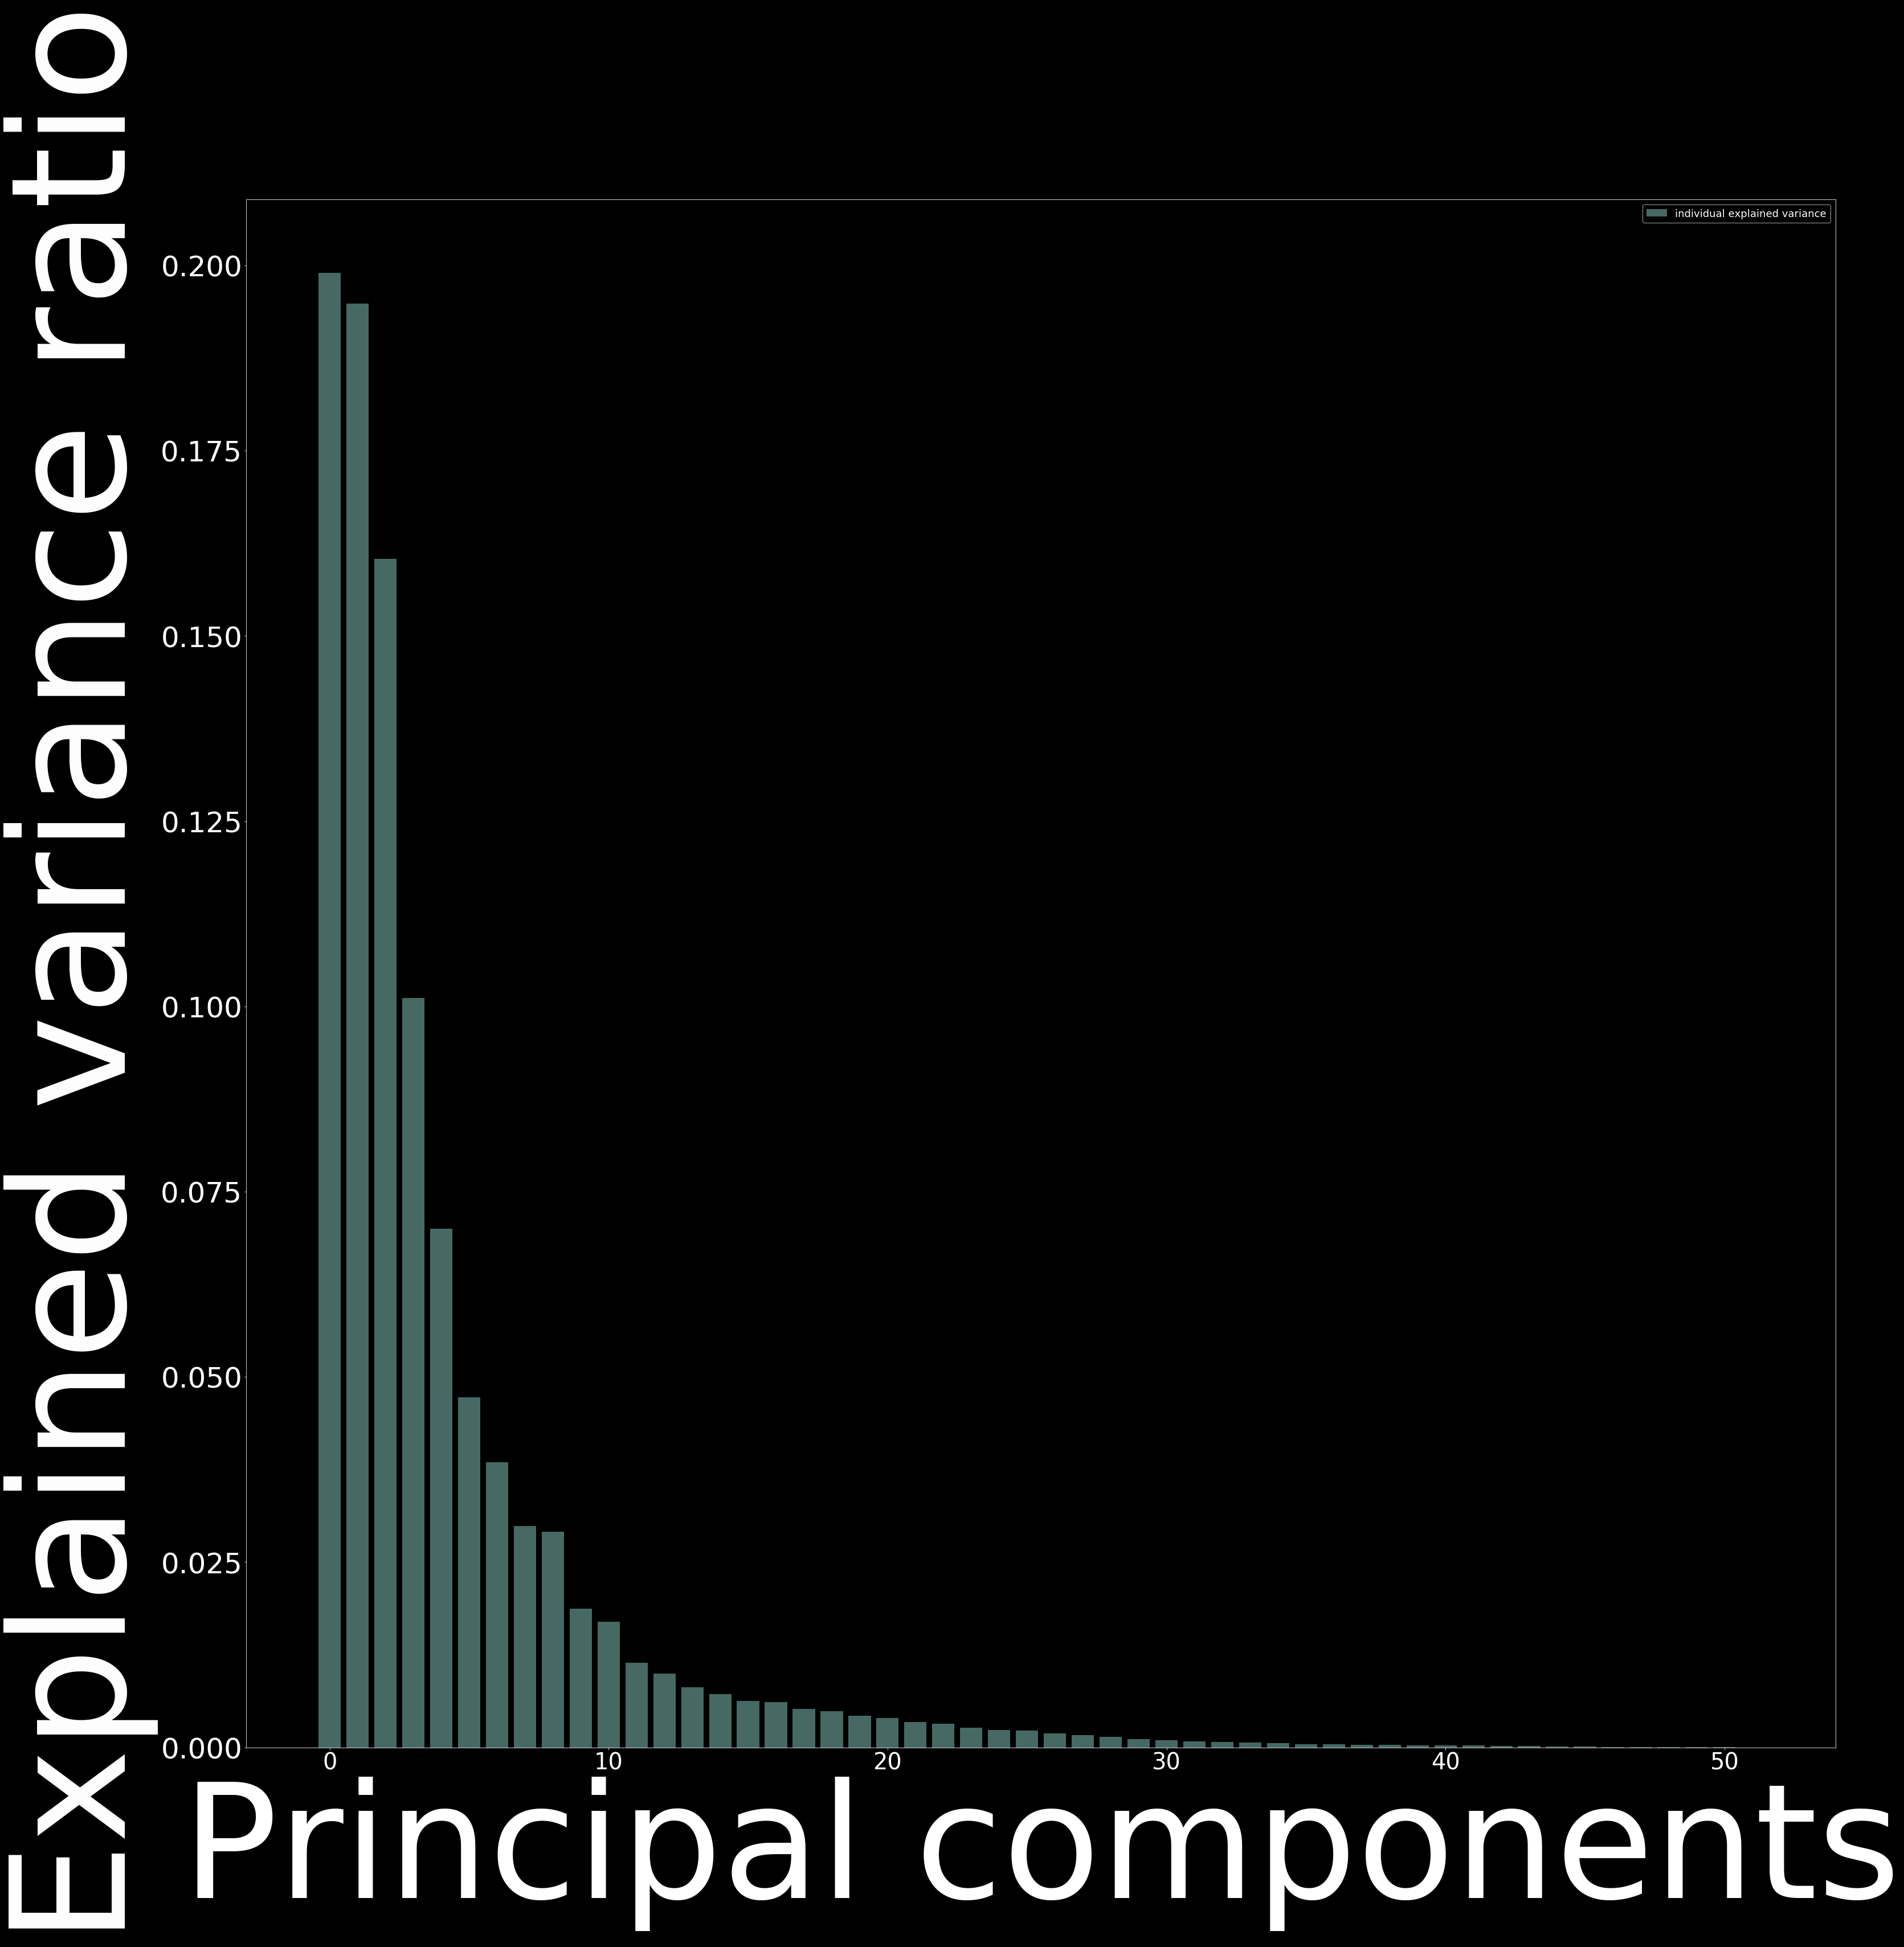

In [140]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(50, 50))

    plt.bar(range(52), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    #plt.tight_layout()

The first principal component contains about 20% of the information. From the above graph, first 6 Principal Components should be enough.

In [141]:
pca2 = PCA(n_components=6)
p_comp2 = pca2.fit_transform(pca_features)
p_comp2

array([[-1.58323978, -1.03968134, -0.03228809,  1.47680041, -2.23496424,
        -1.08031196],
       [-1.73276122, -1.02470222, -0.22328829,  1.41032024, -2.25862146,
        -1.0977265 ],
       [-1.393121  , -0.64324702,  1.01229249,  1.57280463, -1.73931976,
        -0.49267008],
       ...,
       [ 0.45964862, -0.73028827, -1.59673051, -1.12032237, -1.05581063,
        -0.124426  ],
       [ 0.2130596 , -0.4451155 , -1.72473054, -1.14341428, -1.13718695,
        -0.13269659],
       [ 0.11248486, -0.52259035, -1.69756518, -1.21070649, -1.19072782,
        -0.12918816]])

In [142]:
pca2.explained_variance_

array([1.50442055, 1.47297588, 1.21253712, 0.76444441, 0.52925932,
       0.35733735])

In [143]:
df_pca1 = pd.DataFrame(data= p_comp2, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'])
df_pca1

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0      -1.583240 -1.039681 -0.032288  1.476800 -2.234964 -1.080312
1      -1.732761 -1.024702 -0.223288  1.410320 -2.258621 -1.097727
2      -1.393121 -0.643247  1.012292  1.572805 -1.739320 -0.492670
3      -0.467656 -0.515614  1.433315  1.789586 -1.690070 -0.365262
4      -1.686964 -1.082592 -0.279455  1.412734 -2.222454 -1.060446
...          ...       ...       ...       ...       ...       ...
581007  0.817732 -0.887879 -1.372542 -1.062788 -0.965740 -0.108013
581008  0.722121 -0.930363 -1.453013 -1.078577 -0.978018 -0.115336
581009  0.459649 -0.730288 -1.596731 -1.120322 -1.055811 -0.124426
581010  0.213060 -0.445116 -1.724731 -1.143414 -1.137187 -0.132697
581011  0.112485 -0.522590 -1.697565 -1.210706 -1.190728 -0.129188

[581012 rows x 6 columns]

In [333]:
pca_target = pca_target.reset_index(drop=True)
pca_target

Cover_Type
0                2
1                2
2                2
3                2
4                2
...            ...
472668           3
472669           3
472670           3
472671           3
472672           3

[472673 rows x 1 columns]

In [335]:
#df_pca1['Cover_Type'] = pca_target
#df_pca1 = df_pca1.drop(columns=['Cover_Type'])
df_pca1

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0       1.064327 -2.005291  0.904294  0.275773 -0.250152 -1.624234
1      -0.656314 -1.842778  1.221782  1.018540 -0.386277 -1.967714
2       1.410387 -2.268328  0.934929  0.964239 -1.365488  0.409431
3       2.831022 -1.478954  0.638936  1.997526 -1.192053  0.702840
4       1.822401 -2.445682  1.022469  0.577853 -1.267566  0.648046
...          ...       ...       ...       ...       ...       ...
472668  0.642910  3.298088  0.723720 -2.556705 -1.171984 -0.365845
472669  0.627034  3.238003  0.777827 -2.679965 -1.158394 -0.342352
472670  0.228398  3.070687  0.952774 -2.888031 -1.169203 -0.339170
472671 -0.266548  2.908913  1.135942 -3.037459 -1.189633 -0.337975
472672 -0.190622  2.821507  1.162723 -3.213038 -1.164496 -0.278752

[472673 rows x 6 columns]

In [144]:
X_PCA = df_pca1

In [145]:
Y_PCA = pca_target

In [146]:
ols_model = sm.OLS(Y_PCA,X_PCA)
result = ols_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cover_Type   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3001.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:30:30   Log-Likelihood:            -1.3437e+06
No. Observations:              581012   AIC:                         2.687e+06
Df Residuals:                  581006   BIC:                         2.687e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PCA1           0.2570      0.003     98.317      0.000       0.252       0.262
PCA2          -0.0012      0.003     -0.437      0.662      -0.006       0.004
PCA3          -0.1273      0.003    -43.730      0.000      -0.133      -0.122
PCA4          -0.0580      0.004    -15.817      0.000      -0.065      -0.051
PCA5          -0.3333      0.004    -75.630      0.000      -0.342      -0.325
PCA6           0.1149      0.005     21.417      0.000       0.104       0.125
==============================================================================
Omnibus:                   330768.810   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2276605.064
Skew:                           2.782   Prob(JB):                         0.00
Kurtosis:                      10.943   Cond. No.                         2.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is no multicollinearity between the Principal components. 

Now run the Random Forest Classifier taking the Principal components as the features

In [147]:
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(X_PCA, Y_PCA, test_size=0.4, random_state=42)

In [148]:
rf_pca = RandomForestClassifier(n_estimators=10)
rf_pca

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [149]:
rf_pca.fit(X_train_PCA, Y_train_PCA)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [150]:
Y_pred_PCA = rf_pca.predict(X_test_PCA)
print ("Random forest Accuracy Report : ")
print(classification_report(Y_test_PCA, Y_pred_PCA))

Random forest Accuracy Report : 
             precision    recall  f1-score   support

          1       0.84      0.88      0.86     84633
          2       0.87      0.88      0.87    113390
          3       0.80      0.81      0.80     14269
          4       0.78      0.57      0.66      1065
          5       0.84      0.41      0.55      3906
          6       0.77      0.54      0.64      6995
          7       0.93      0.76      0.84      8147

avg / total       0.85      0.85      0.85    232405



In [33]:
#From all the above models, the best models are Random Forest and KNN using the features either from Set 1 or Set 4, Set 7. 
#Final Features after feature Selecion is - 


['Elevation', 'Aspect', 'Horz_Dist_To_Hydro', 'Vert_Dist_To_Hydro',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type10', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type2', 'Soil_Type22', 'Soil_Type29', 'Soil_Type3',
       'Soil_Type30', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type38', 'Soil_Type39', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6']

['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Aspect', 'Hillshade_3pm',
        'Slope', 'Wilderness_Area4', 'Soil_Type22',
       'Wilderness_Area3', 'Soil_Type4', 'Soil_Type10', 'Soil_Type38',
       'Soil_Type23', 'Soil_Type39', 'Soil_Type12']
       
       
  

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Horz_Dist_To_Hydro',
 'Vert_Dist_To_Hydro',
 'Aspect',
 'Hillshade_3pm',
 'Slope',
 'Wilderness_Area4',
 'Soil_Type22',
 'Wilderness_Area3',
 'Soil_Type4',
 'Soil_Type10',
 'Soil_Type38',
 'Soil_Type23',
 'Soil_Type39',
 'Soil_Type12']

### Model Selection & Hyperparameter tuning

Lets apply GridSearch and Cross Validation to the best model - Random Forest and also regularize it using few of its Hyperparameter

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

### K-Nearest Neighbor

In [171]:
params_knn = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

### Random Forest

In [193]:
params_rf = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 20],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [10, 20, 50]
    }

In [195]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42 )

grid_rf = GridSearchCV(estimator= RandomForestClassifier(),
                        param_grid=params_rf,
                        cv = kfold,
                        n_jobs= -1,
                        verbose=1)

grid_rf.fit(X_train_8, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 17.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 20], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [197]:
grid_rf.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 50}

In [198]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [199]:
grid_rf.best_score_

0.9166724037884674

In [200]:
grid_rf.score(X_test_8, Y_test)

0.9181085918854416

In [37]:
params_rf = {
    'bootstrap': [False],
    'max_depth': [20, 30],
    'max_features': ['auto'],
    'n_estimators': [50, 100]
    }



kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42 )

grid_rf = GridSearchCV(estimator= RandomForestClassifier(),
                        param_grid=params_rf,
                        cv = kfold,
                        n_jobs= -1,
                        verbose=1)


X_train_7 = X_train[features_selected7]
X_test_7 = X_test[features_selected7]

grid_rf.fit(X_train_7, Y_train)



Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 12.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [False], 'max_depth': [20, 30], 'max_features': ['auto'], 'n_estimators': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [38]:
grid_rf.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 100}

In [39]:
grid_rf.best_score_

0.9585550321114903

In [40]:
grid_rf.score(X_test_7, Y_test)

0.9618941619239949

Final Features -

features_selected7 = ['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Horz_Dist_To_Hydro',
       'Vert_Dist_To_Hydro', 'Aspect', 'Hillshade_3pm',
        'Slope', 'Wilderness_Area4', 'Soil_Type22',
       'Wilderness_Area3', 'Soil_Type4', 'Soil_Type10', 'Soil_Type38',
       'Soil_Type23', 'Soil_Type39', 'Soil_Type12']


Hurray, I successfully done the Hyperparameter Tuning for increasing the testing accuracy to 96.18% using Grid Search and StratifiedKFold Cross Validation 


### Q1. Is the Relationship Significant?

Yes, the relationship is significant between the features(Independent variables) and the target(Dependent variable). 
I am able to Classify the Forest Cover Type using the selected features after feature selection with a testing f1-score of 96%.
As clear from the Significance tests on the data, the features have a significant relationship with the target with more than 95% confidence interval

### Q2. Are any model assumptions violated?

No model assumptions are violated

### Q3. Is there any multi-collinearity in the model?

There is no multi-collinearity in the model. Initially the 3 features had multi-collinearity, I used VIF score Analysis and Princial Component Analysis to remove that. 

### Q4. In the multivariate models are predictor variables independent of all the other predictor variables?

Few predictor variables had correlation with each other, I used the correlation matrix, pair plot, Recursive Feature Elimination ,feature Importance & various other Feature selection techniques to select the best predictor variables with no high corellation between them. 

### Q5. In the multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

1. 'Elevation'
2. 'Horizontal_Distance_To_Roadways'
3. 'Horizontal_Distance_To_Fire_Points'
4. 'Horz_Dist_To_Hydro',
5. 'Vert_Dist_To_Hydro'
6. 'Aspect'
7. 'Hillshade_3pm'
8. 'Slope'
9. 'Wilderness_Area4'
10. 'Soil_Type22'
11. 'Wilderness_Area3'
12. 'Soil_Type4'
13. 'Soil_Type10'
14. 'Soil_Type38'
15. 'Soil_Type23'
16. 'Soil_Type39'
17. 'Soil_Type12'

### Q6.  Does the model make sense?

Yes, the model make sense and is able to accurately classify the Forest Cover Type with 96% f1-score with using only 17 most significant features out of 54

### Q7. Does regularization help?

- Yes, It does. Random Forest was overfitting with a training accuracy of 99% and testing accuracy of 92%. 
- With regularisation, I optimized the bias variance trade off. The final f1-score is 96.18%

### Q8. Which independent variables are significant?

These are the most Significant Independent Variables - 

'Elevation'
'Horizontal_Distance_To_Roadways'
'Horizontal_Distance_To_Fire_Points'
'Horz_Dist_To_Hydro',
'Vert_Dist_To_Hydro'
'Aspect'
'Hillshade_3pm'
'Slope'
'Wilderness_Area4'
'Soil_Type22'
'Wilderness_Area3'
'Soil_Type4'
'Soil_Type10'
'Soil_Type38'
'Soil_Type23'
'Soil_Type39'
'Soil_Type12'

### Q9. Which hyperparameters are important?

 The Hyperparameters which are important in tuning the Random forest model which was the best model -
 
 
 'max_depth' - This implies the max depth a tree can take,
 'max_features' - Size of random subsets of features
 'n_estimators' - This is the number of individual Decision Trees we want in the Random Forest
 
 The best hyperparameter values after tuning - 
 
 {'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 100}

### Conclusion

- Random Forest Classifier gives the best accuracy of 96.18% using Grid Search and StratifiedKFold Cross Validation for Prediction as compared to Logistic Regression, KNN & XGBoost
- SelectFromModel & Feature importance using ExtraTreeClassifier gives the best Feature selection outcome

### Contribution 

Code written 
- By own: 70%
- By External links used as a reference: 30%

### Citations 


Order of PCA, Scaling - https://stackoverflow.com/questions/46062679/right-order-of-doing-feature-selection-pca-and-normalization

Hypothesis Test - https://www.machinelearningplus.com/statistics/p-value/

Outliers - https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

Feature Scaling - https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e

Feature Selection - https://www.datacamp.com/community/tutorials/feature-selection-python

Significance - https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

Forest Kernel - https://www.kaggle.com/roshanchoudhary/forest-cover-walkthrough-in-python-knn-96-51

Logistic Regression - https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Logistic_Regression.ipynb

XG Boost & Feature Importance - https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

### License

MIT License

Copyright (c) 2020 Nikhil Kohli

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.